<h1>Project 2 Regression Challenge<h1>
<h3>Problem Statement:</h3>
    Predict the price of homes at sale for the Ames Iowa Housing dataset.
    
<h3>Content:</h3>
<ul>
    <li>Overview</li>  
    <li>Data Dictionary</li>   
    <li>Checking of Null Values</li>   
    <li>Exploratory Data Analysis</li>   
    <li>Data Cleaning</li>   
    <li>Feature Engineering</li>   
    <li>Modelling</li>   
    <li>Conclusion</li>   
    <li>Kaggle Submission</li>   
</ul>


<h1>Overview from Kaggle</h1>

Welcome the Kaggle challenge for Project 2!<br>

As part of a successful submission for Project 2, we will expect you to make at least one (and hopefully, multiple!) submissions towards this regression challenge.

In this challenge, you will use the well known Ames housing data to create a regression model that predicts the price of houses in Ames, IA. You should feel free to use any and all features that are present in this dataset.

Goal: It is your job to predict the sales price for each house. For each <code>Id</code> in the test set, you must predict the value of the <code>SalePrice</code> variable.

Evaluation: Kaggle leaderboard standings will be determined by root mean squared error (RMSE).


Submission File Format<br>
The file should contain a header and have the following format:

<code>Id</code>,<code>SalePrice</code>

<center><h1>Data Dictionary</h1></center><BR>
    <p>A list of columns used from the .csv. Data types and descriptions about columns are displayed.</p>

|Feature|Type|Description|
|---|---|---|
 |PID          |int64  |Parcel identification number  - can be used with city web site for parcel review.|
 |Ms Subclass  |int64  |Identifies the type of dwelling involved in the sale.|
 |Ms Zoning    |object |Identifies the general zoning classification of the sale.|
 |Lot Frontage |float64|Linear feet of street connected to property.|
 |Lot Area     |int64  |Lot size in square feet.|
 |Street       |object |Type of road access to property.|
 |Alley        |object |Type of alley access to property.|
 |Lot Shape    |object |General shape of property.|
 |Land Contour |object |Flatness of the property.|
 |Utilities    |object |Type of utilities available.|
 |Lot Config   |object |Lot configuration.|
 |Land Slope   |object |Slope of property.|
 |Neighborhood |object |Physical locations within Ames city limits (map available).|
 |Condition 1  |object |Proximity to various conditions.|
 |Condition 2  |object |Proximity to various conditions (if more than one is present).|
 |Bldg Type    |object |Type of dwelling.|
 |House Style  |object |Style of dwelling.|
 |Overall Qual |int64  |Rates the overall material and finish of the house.|
 |Overall Cond |int64  |Rates the overall condition of the house.|
 |Year Built   |int64  |Original construction date.|
 |Year Remod/Add|int64  |Remodel date (same as construction date if no remodeling or additions).|
 |Roof Style   |object |Type of roof.|
 |Roof Matl    |object |Roof material.|
 |Exterior 1st |object |Exterior covering on house.|
 |Exterior 2nd |object |Exterior covering on house (if more than one material).|
 |Mas Vnr Type |object |Masonry veneer type.|
 |Mas Vnr Area |float64|Masonry veneer area in square feet.|
 |Exter Qual   |object |Evaluates the quality of the material on the exterior.|
 |Exter Cond   |object |Evaluates the present condition of the material on the exterior.|
 |Foundation   |object |Type of foundation.|
 |Bsmt Qual    |object |Evaluates the height of the basement.|
 |Bsmt Cond   |object |Evaluates the general condition of the basement.|
 |Bsmt Exposure|object |Refers to walkout or garden level walls.|
 |BsmtFin Type 1|object |Rating of basement finished area.|
 |BsmtFin SF 1 |float64|Type 1 finished square feet.|
 |BsmtFin Type 2|object |Rating of basement finished area (if multiple types).|
 |BsmtFin SF 2 |float64|Type 2 finished square feet.|
 |Bsmt Unf SF  |float64|Unfinished square feet of basement area.|
 |Total Bsmt SF|float64|Total square feet of basement area.|
 |Heating      |object |Type of heating.|
 |Heating QC   |object |Heating quality and condition.|
 |Central Air  |object |Central air conditioning.|
 |Electrical   |object |Electrical system.|
 |1st Flr SF   |int64  |First Floor square feet.|
 |2nd Flr SF   |int64  |Second Floor square feet.|
 |Low Qual Fin SF|int64  |Low quality finished square feet (all floors).|
 |Gr Liv Area  |int64  |Above grade (ground) living area square feet.|
 |Bsmt Full Bath|float64|Basement full bathrooms.|
 |Bsmt Half Bath|float64|Basement half bathrooms.|
 |Full Bath    |int64  |Full bathrooms above grade.|
 |Half Bath    |int64  |Half bathrooms above grade.|
 |Bedroom AbvGr|int64  |Bedrooms above grade (does NOT include basement bedrooms).|
 |Kitchen AbvGr|int64  |Kitchens above grade.|
 |Kitchen Qual |object |Kitchen quality.|
 |TotRms AbvGrd|int64  |Total rooms above grade (does not include bathrooms).|
 |Functional   |object |Home functionality (Assume typical unless deductions are warranted).|
 |Fireplaces   |int64  |Number of fireplaces.|
 |Fireplace Qu |object |Fireplace quality.|
 |Garage Type  |object |Garage location.|
 |Garage Yr Blt|float64|Year garage was built.|
 |Garage Finish|object |Interior finish of the garage.|
 |Garage Cars  |float64|Size of garage in car capacity.|
 |Garage Area  |float64|Size of garage in square feet.|
 |Garage Qual  |object |Garage quality.|
 |Garage Cond  |object |Garage condition.
 |Paved Drive  |object |Paved driveway.|
 |Wood Deck SF |int64  |Wood deck area in square feet.|
 |Open Porch SF|int64  |Open porch area in square feet.|
 |Enclosed Porch|int64  |Enclosed porch area in square feet.|
 |3Ssn Porch   |int64  |Three season porch area in square feet.|
 |Screen Porch |int64  |Screen porch area in square feet.|
 |Pool Area    |int64  |Pool area in square feet.|
 |Pool QC      |object |Pool quality.|
 |Fence        |object |Fence quality.|
 |Misc Feature |object |Miscellaneous feature not covered in other categories.|
 |Misc Val     |int64  |$ Value of miscellaneous feature.|
 |Mo Sold      |int64  |Month Sold (MM).|
 |Yr Sold      |int64  |Year Sold (YYYY).|
 |Sale Type    |object |Type of sale.|
 |SalePrice    |int64  |Sale price $$.|

In [1]:
# Import relevant libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import scipy.stats as stats

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
# reading in train.csv and test.csv
# set_option to remove ... for columns

train_df = pd.read_csv('../datasets/train.csv')
test_df = pd.read_csv('../datasets/test.csv')
pd.set_option('display.max_columns', 500)

In [3]:
# check shape

train_df.shape

(2051, 81)

In [4]:
# check shape

test_df.shape

(878, 80)

In [5]:
# identify no. of columns, types of each column, non-null values, column names

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
# identify no. of columns, types of each column, non-null values, column names

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [7]:
# identify columns

train_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
# identify columns

test_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

<center><h2>Checking of Null Values</h2></center>
<h3>Objectives:</h3>
<ul>
    <li>Identify columns with null values</li>
</ul><br>

### Notable Columns: Alley, Pool QC, Fence, Misc Feature and Fireplace QC, PID, Id
Since the data set has 2000+ rows in total, it might be safe to drop columns with too many null values. However, we would need to gather the meaning of these missing values to safely assume we would not require them. Further analysis would be made to ensure that missing values are not neglected, it will be done at a later stage.

In [9]:
# unique - probably primary key identifiers

train_df['PID'].is_unique

True

In [10]:
# unique - probably primary key identifiers

test_df['PID'].is_unique

True

In [11]:
# unique - probably primary key identifiers

train_df['Id'].is_unique

True

In [12]:
# unique - probably primary key identifiers

test_df['Id'].is_unique

True

<center><h3>Things to take note of</h3></center><br>
Columns like <code>Alley</code>, <code>Fireplace Qu</code> have LOTS of missing values in both data frames. For smaller quantities in <code>Total Bsmt SF</code>, <code>Garage Cars</code>, we could safely replace these rows with values from other rows.

In [13]:
# check all columns with null values

train_df.isnull().sum()[train_df.isnull().sum()!=0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [14]:
# check all columns with null values

test_df.isnull().sum()[test_df.isnull().sum()!=0]

Lot Frontage      160
Alley             820
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           874
Fence             706
Misc Feature      837
dtype: int64

In [15]:
# checking no. of types of columns
print('object type columns: ' + str(len(train_df.select_dtypes(object).columns)))
categorical_cols = train_df.select_dtypes(object).columns

# checking no. of types of columns
print('float type columns: ' + str(len(train_df.select_dtypes(float).columns)))
float_cols = train_df.select_dtypes(float).columns

# checking no. of types of columns
print('int type columns: ' + str(len(train_df.select_dtypes(int).columns)))
int_cols = train_df.select_dtypes(int).columns

object type columns: 42
float type columns: 11
int type columns: 28


<center><h1>Exploratory Data Analysis</h1></center>
<h3>Objectives:</h3>
<ul>
    <li>Identify correlation (Columns vs <code>SalePrice</code>)</li>
    <li>Identify patterns with different types of graphs</li>
    <li>Analyze correlation based on numerical columns and categorical columns</li>
</ul><br>

<center><h2>Heatmap</h2></center>

In [16]:
# too many variables, pick top 20, adjusting correlation

train_df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045328
Id                -0.051398
MS SubClass       -0.087335
Overall Cond      -0

Interestingly, we can tell from the heat map that <code>Overall Qual</code>, <code>Gr Liv Area</code>, <code>Garage Area</code> etc have the highest correlations with <code>SalePrice</code>.

<code>Overall Qual</code> rates the overall material and finish of the house - in a rating-based metrics.<br>
<code>Gr Liv Area</code> is the size of the living area, measured in square feet.
<code>Garage Area</code>, coincidentally, is also the size of the garage area, measured in square feet.

<b>Size</b> could be a factor in higher <code>SalePrice</code>.

From the heatmap, I would like to find out whether each type of metric can affect the correlation to <code>SalePrice</code>

I will split them into:
<ul>
    <li>Rating-Related Relationship</li>
    <li>Area-Related Relationship</li>
    <li>Facility-Related Relationship</li>
    <li>Time-Related Relationship</li>
</ul>

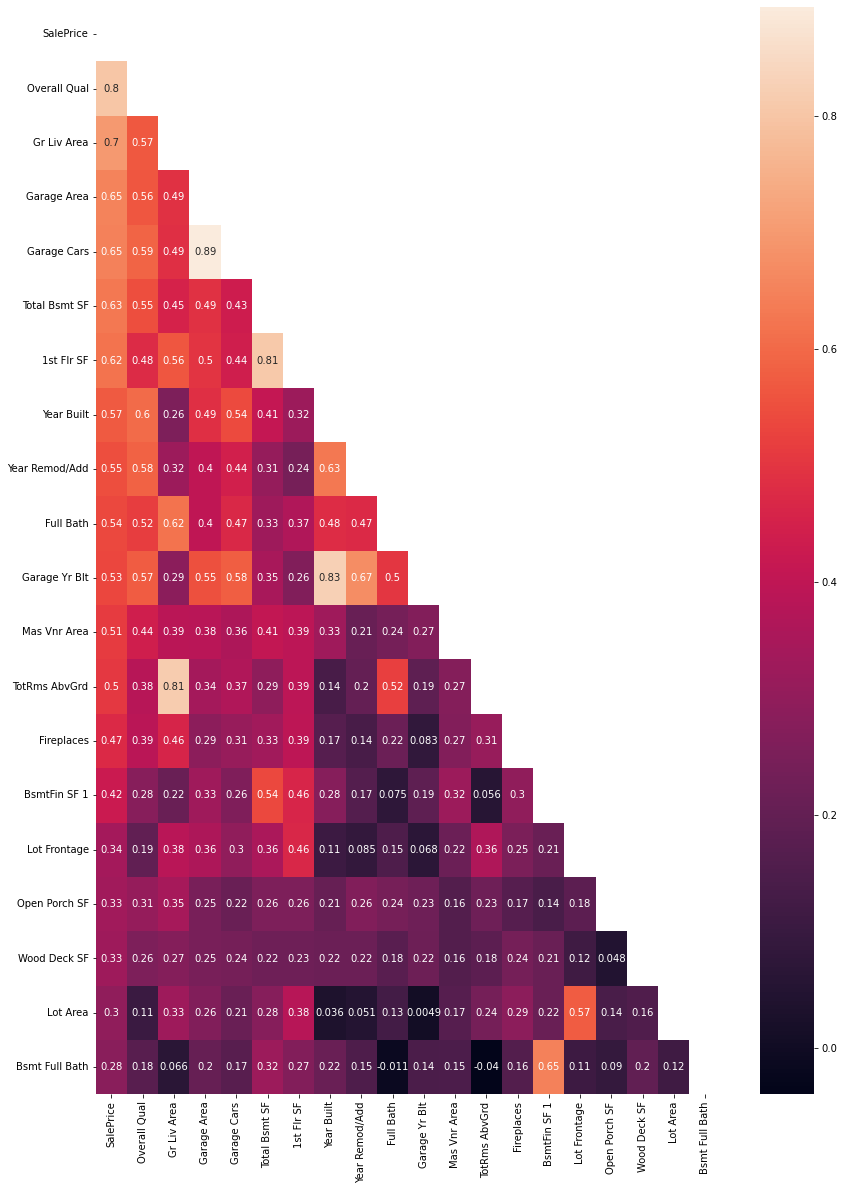

In [17]:
train_df_corr = np.abs(train_df.corr()['SalePrice'].sort_values(ascending=False)).head(20).index
plt.figure(figsize=(14,20))
mask = np.triu(np.ones_like(train_df_corr))
ax = sns.heatmap(train_df[train_df_corr].corr(), mask=mask, annot=True)

In [18]:
categorical_cols

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [19]:
# take SalePrice as target for x-axis

target = train_df['SalePrice']
target

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2051, dtype: int64

<center><h2>Let's check the graphs of these Numerical columns</h2></center>
<h3>Objectives:</h3>
<ul>
    <li>Split columns and plot graphs if too big</li>
    <li>Produce Scatterplots</li>
    <li>Produce Histograms</li>
</ul><br>

<h1><center>EDA - Numerical Columns</center></h1>

For these numerical columns, some of the informatics in the scatterplots have shown us very interesting relationship between each column and <code>SalePrice</code>. Let's take a look at a few noticable examples:

<h3>Rating-Related Relationships</h3>
<ul>
    <li><code>Overall Cond</code> - (House) overall condition of the house.</li>
    It is clearly shown in the graph that it has a negative correlation to prices?<br><br>
    
<li><code>Overall Qual</code> - (House) rates the overall material and finish of the house.</li>
    It is clearly shown in the graph that higher quality means higher price, but doesn't it affect <code>Overall Cond</code>?
<br>
</ul>

<h3>Area-Related Relationships</h3>
<ul>
    <li><code>Garage Area</code> - (Garage Size) size calculation in square feet.</li>
    Unlike in Singapore, apparently most houses have garage area attached to their homes. The size of this affects the prices by a significant amount.
<br><br>
    <li><code>Gr Liv Area</code> - (Living Space) size calculation in square feet</li>
    Living area refers to the size of the home in square feet. It makes sense because as your house is bigger, it is going to cost more.
    
In my honest opnion, it seems to me that everything related to area size should be related to <code>SalePrice</code>, like <code>1st Flr SF</code>. However, this is not the case. A lot of houses have 0.0 (bef. data cleaning: Null) indicating they do not have like <code>2nd Flr SF</code>, but have high <code>SalePrice</code>. No obvious patterns to indicate other Area-related columns have strong correlation.
</ul>

<h3>Facility-Related Relationships</h3>
<ul>
<li><code>Fireplaces</code> - (Fireplace) quantity (2)</li><br>
<li><code>Full Bath</code> - (Bathroom) quantity (2)</li><br>
<li><code>Half Bath</code> - (Bathroom) quantity (1)</li><br>
<li><code>Kitchen AbvGr</code> - (Kitchen) quantity (1)</li><br>
<li><code>Garage Cars</code> - (Garage) quantity (3)</li><br>
Interestingly, these facilities correlate with prices on specific quantity. Example: Having too many <code>Fireplaces</code> or kitchen might be too bad? This column could be related to <code>Garage Area</code> as well since it relates to how many cars you can keep.
</ul>

    
<h3>Time-Related Relationships</h3>
<ul>
<li><code>Year Built</code> - (House) original construction date</li>
    Newer houses tend to cost more, as seen from the graph, from 2000.
<br><br>
<li><code>Garage Yr Blt</code> - (Garage) year garage was built</li>
    <code>SalePrice</code> shoots up from 2000.
</ul>

However, <code>Mo Sold</code> and <code>Yr Sold</code> don't seem to have any obvious trend.

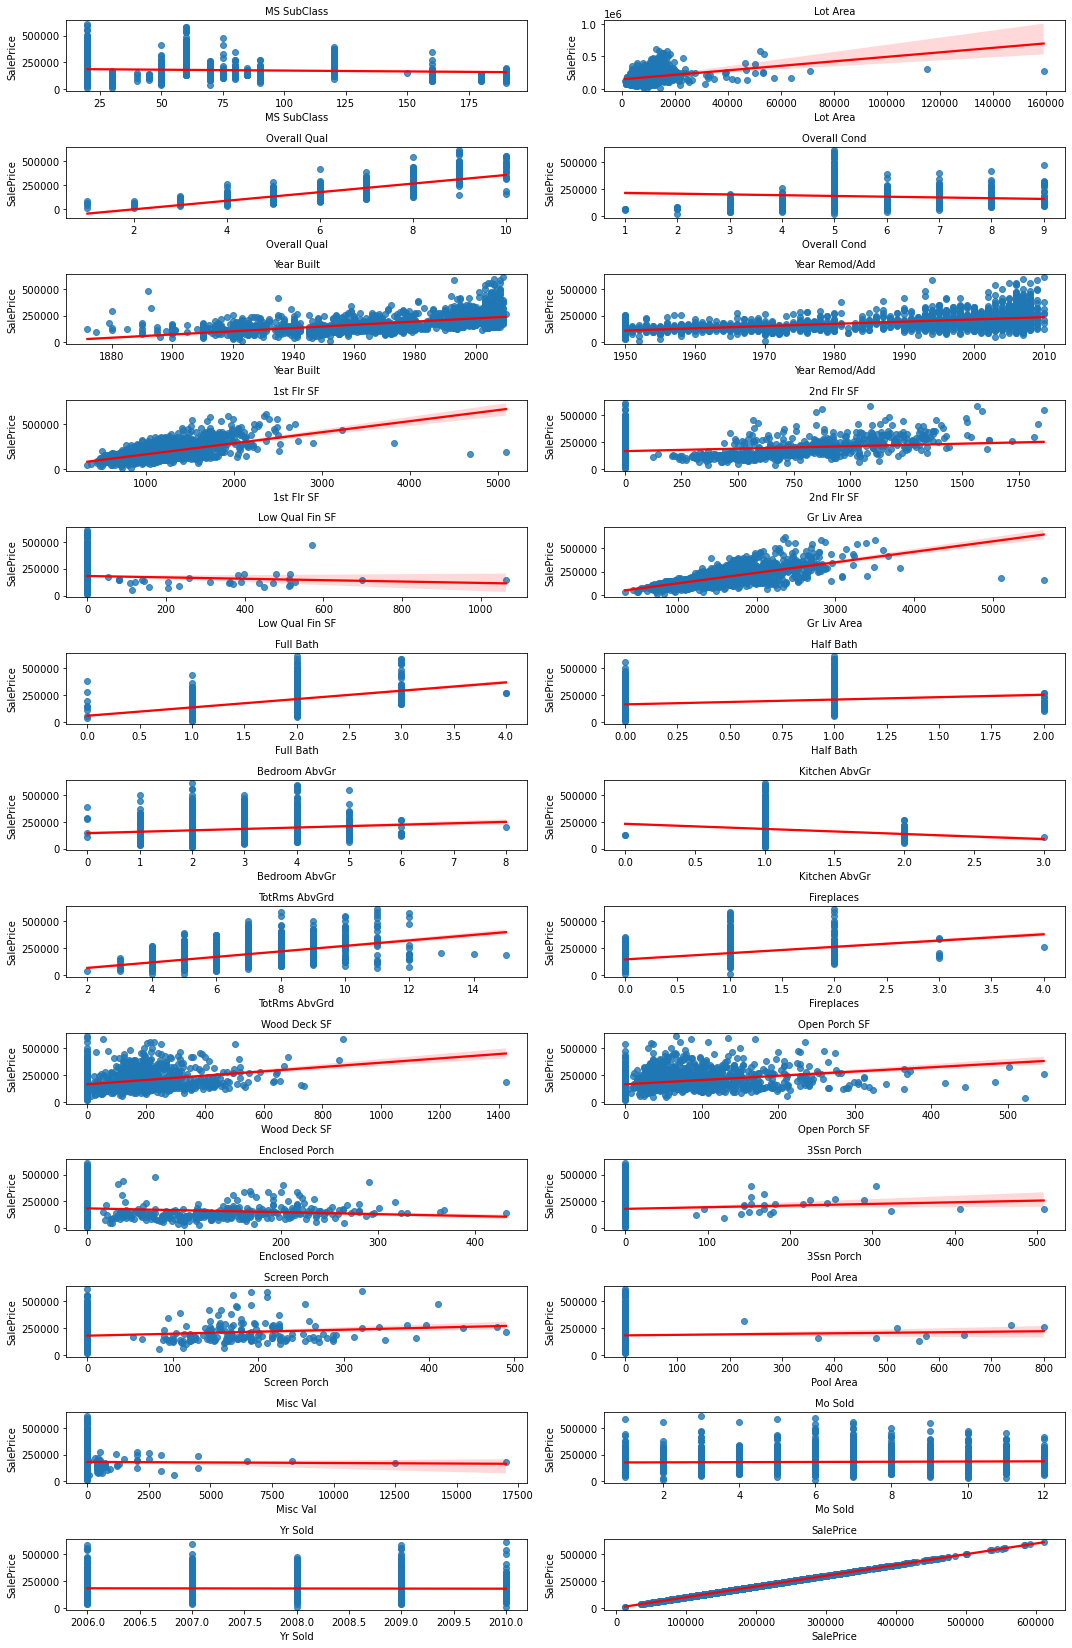

In [20]:
# int_cols
# start from [2::], removing Id and PID

fig, ax = plt.subplots(nrows=13, ncols=2, figsize=(15, 23))
ax = ax.ravel()
    
for n, col in enumerate(int_cols[2::]):
    g = sns.regplot(data=train_df, x=col, y=target, line_kws={'color': 'red'}, ax=ax[n])
    ax[n].set_title(col, fontsize=10)
    plt.tight_layout()

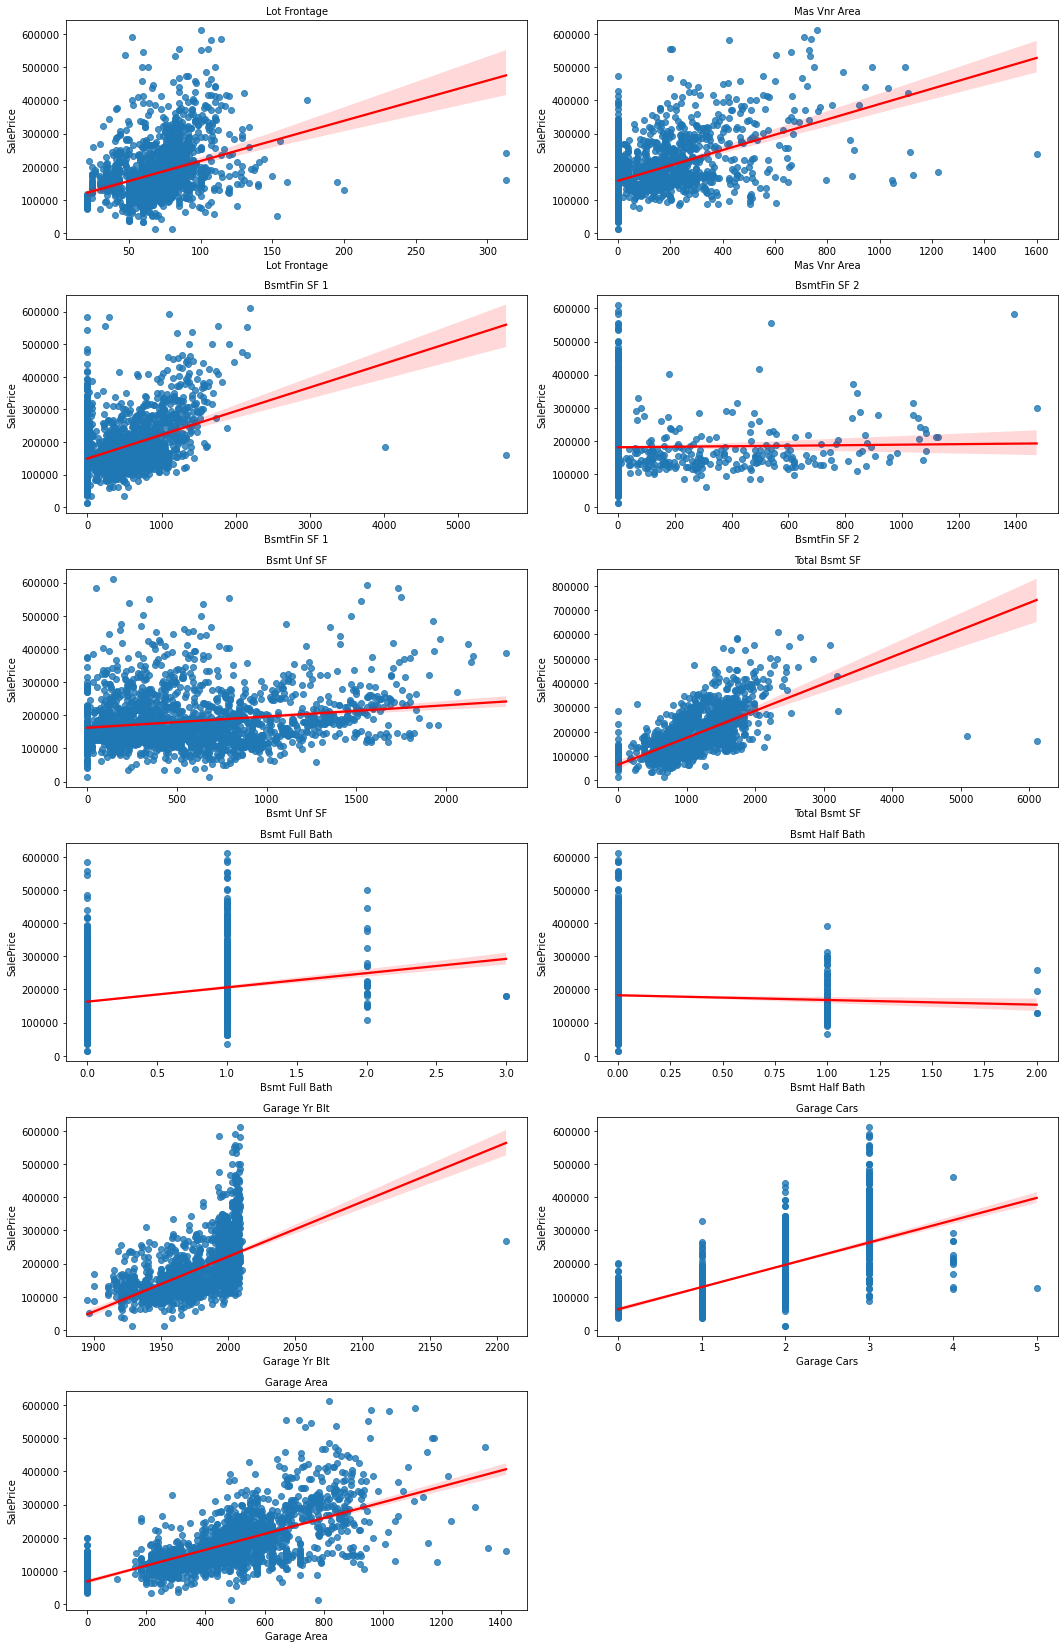

In [21]:
# float_cols

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15, 23))
ax = ax.ravel()
    
for n, col in enumerate(float_cols):
    g = sns.regplot(data=train_df, x=col, y=target, line_kws={'color': 'red'}, ax=ax[n])
    ax[n].set_title(col, fontsize=10)
    plt.tight_layout()

ax[-1].set_visible(False)

From the Histograms, we can specifically see that some columns are exteremly skewed. Features such as <code>Pool Area</code> and <code>Misc Val</code> show that an absurb frequency is on that value. These columns can be ineffective because most of the data consists of that value.

<code>Garage Area</code>, <code>Gr Liv Area</code>, <code>Mo Sold</code> are examples of normally distributed data. 

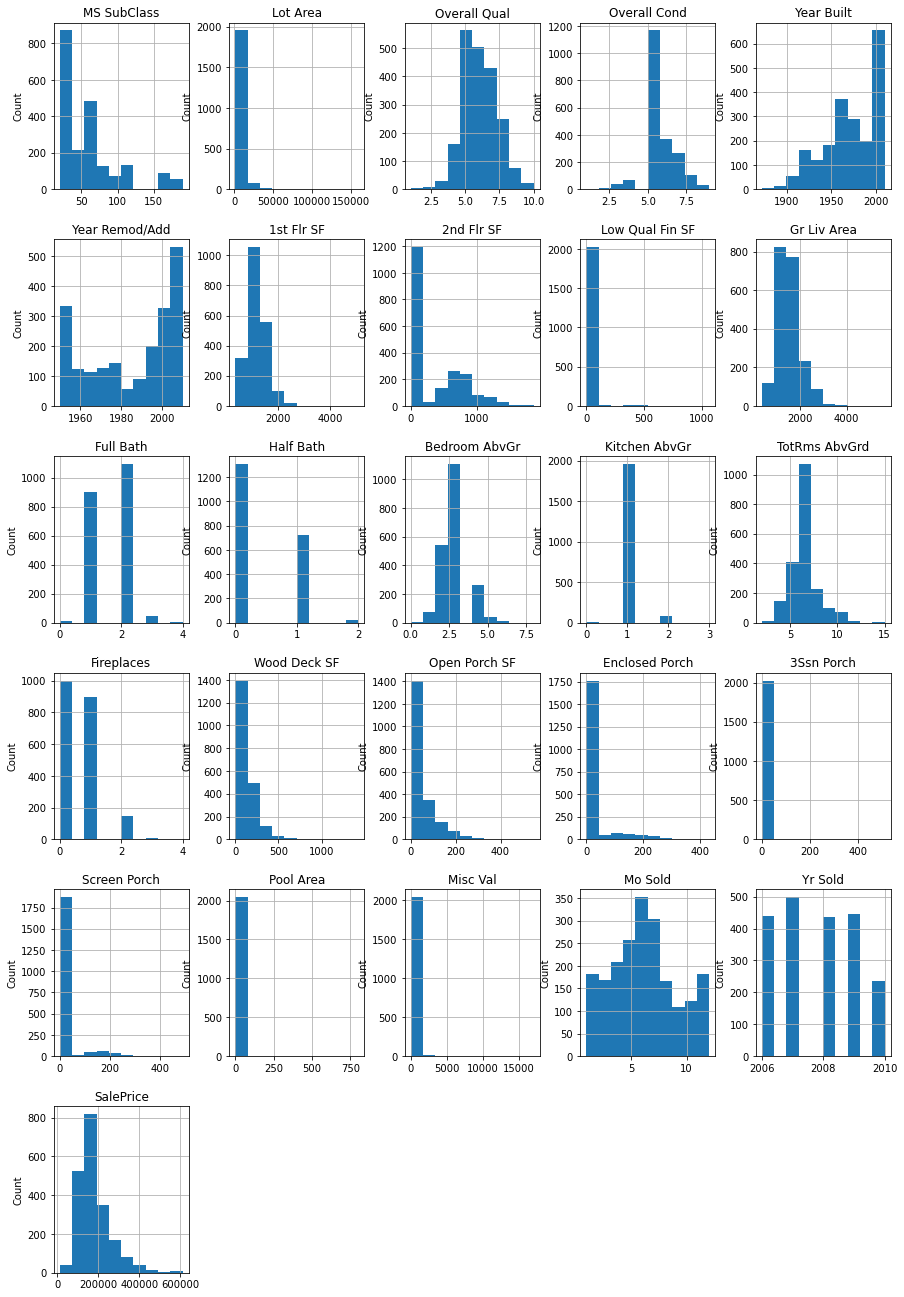

In [22]:
# int_cols
# display histograms of all numerical columns

int_g = train_df[int_cols[2::]].hist(figsize=(15, 23))
for ax in int_g.flatten():
    ax.set_ylabel("Count")

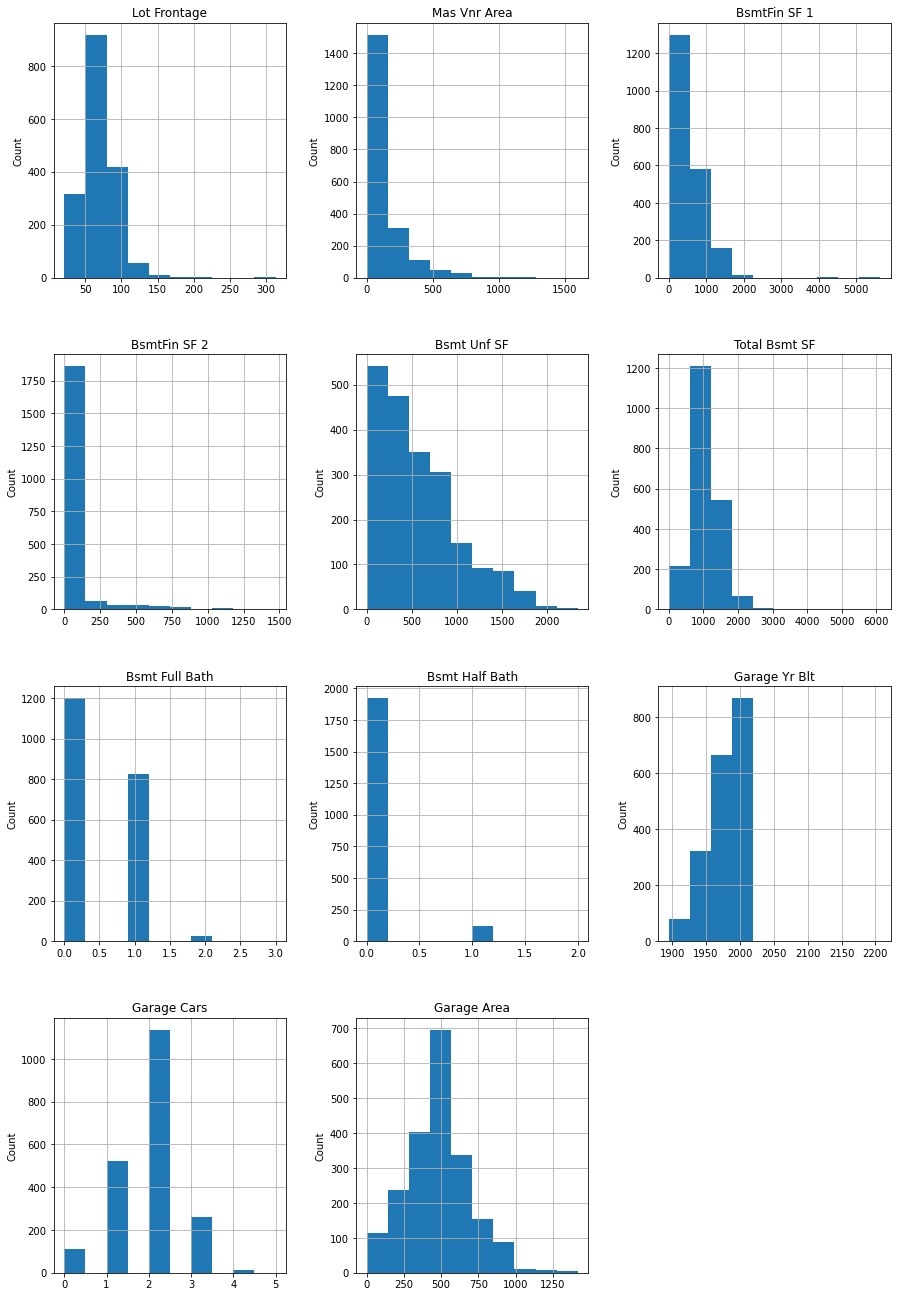

In [23]:
float_g = train_df[float_cols].hist(figsize=(15, 23))
for ax in float_g.flatten():
    ax.set_ylabel("Count")

<center><h2>Let's check the graphs of these Categorical columns</h2></center>
<h3>Objectives:</h3>
<ul>
    <li>Split columns and plot graphs if too big</li>
    <li>Produce Boxplots</li>
    <li>Produce Histograms</li>
</ul><br>

<h1><center>EDA - Categorical Columns</center></h1>

For these categorical columns, I have chosen some noticable categorical columns:

<ul>
    <li><code>Condition 1</code> & <code>Condition 2</code> - (Surrounding) proximity to various conditions.</li>
    It is clearly shown in the graph PosA and PosN are important factors since they have a high median. They both mean that that the houses near some sort of a off-site feature like parks are higher in costs<br><br>
    
<li><code>Roof Matl</code> - (House) roof material.</li>
    In addition to outside research, there is a reason why WdShngl has higher cost. They are one of the best insulating materials for warm during the winter and coolness during the summer.<br><br>
    
<li><code>Paved Drive</code> - (House) Paved drive way.</li>
    Paved driveway has a higher median prices than the rest.<br><br>
    
<li><code>Heating QC</code> - (House) heating quality and condition.</li>
    Excellent condition has a higher median prices than the rest.<br><br>
    
<li><code>Neighborhood</code> - (Surrounding) physical locations within Ames city limits.</li>
    NridgeHt, StoneBr and NoRidge have hgiher median prices than some of the neighborhoods. Neighborhoods like Landmrk has such a small sample size.
<br><br>
    
<li><code>Fence</code>, <code>Garage Finish</code>, <code>Kitchen Qual</code> etc</li>
    They have a few distinct outliers.
<br><br>
    
<li><code>Utilities</code> - (House) type of utilities available.</li>
    Almost all fall under one column (AllPub - Elec,Gas,Water &S). It could be insignificant to <code>SalePrice</code>.
<br>
</ul>

<b>Note: It seems like columns like <code>Heating QC</code> or <code>Paved Drive</code> have distinct higher median prices. It could be as quality of living is high, it correlate to <code>SalePrice</code>. It is also interesting to note that Rating values in like <code>Overall Qual</code> and <code>Exter Qual</code> should be ordinated and dummified.</b>

<Figure size 432x288 with 0 Axes>

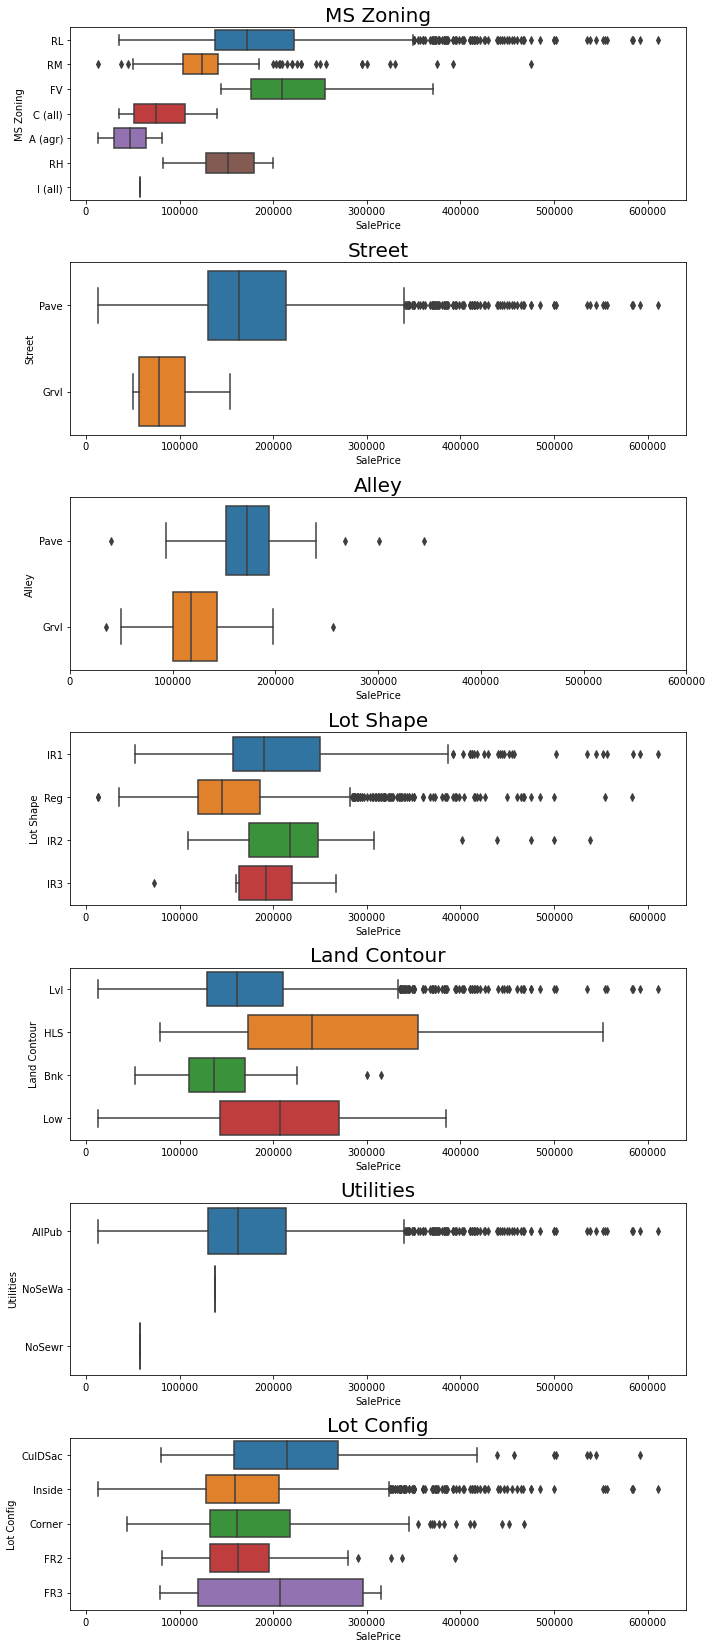

In [24]:
fig = plt.figure()
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10, 23))
ax = ax.ravel()
    
for n, col in enumerate(categorical_cols[0:7]):
    g = sns.boxplot(data=train_df, y=col, x=target, ax=ax[n], orient='h')
    ax[n].set_title(col, fontsize=20)
    g.set(xticks=[0, 100000, 200000, 300000, 400000, 500000, 600000])
    plt.tight_layout()

Text(0.5, 1.0, 'Neighborhood')

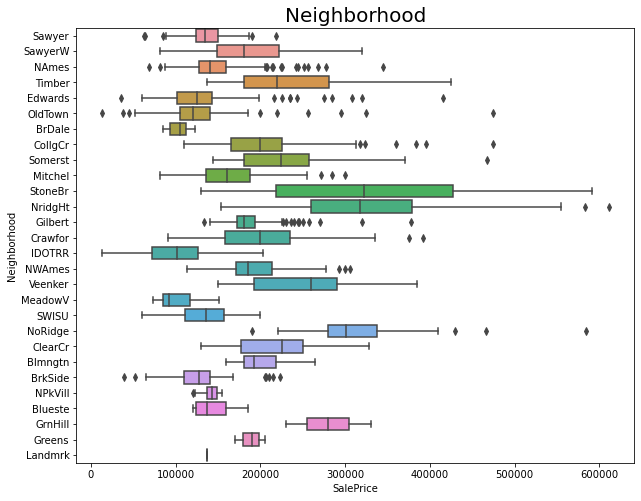

In [25]:
fig = plt.figure(figsize=(10, 8))
g = sns.boxplot(data=train_df, y=categorical_cols[8], x=target)
g.set(xticks=[0, 100000, 200000, 300000, 400000, 500000, 600000]);
g.set_title(categorical_cols[8], fontsize=20)

<Figure size 432x288 with 0 Axes>

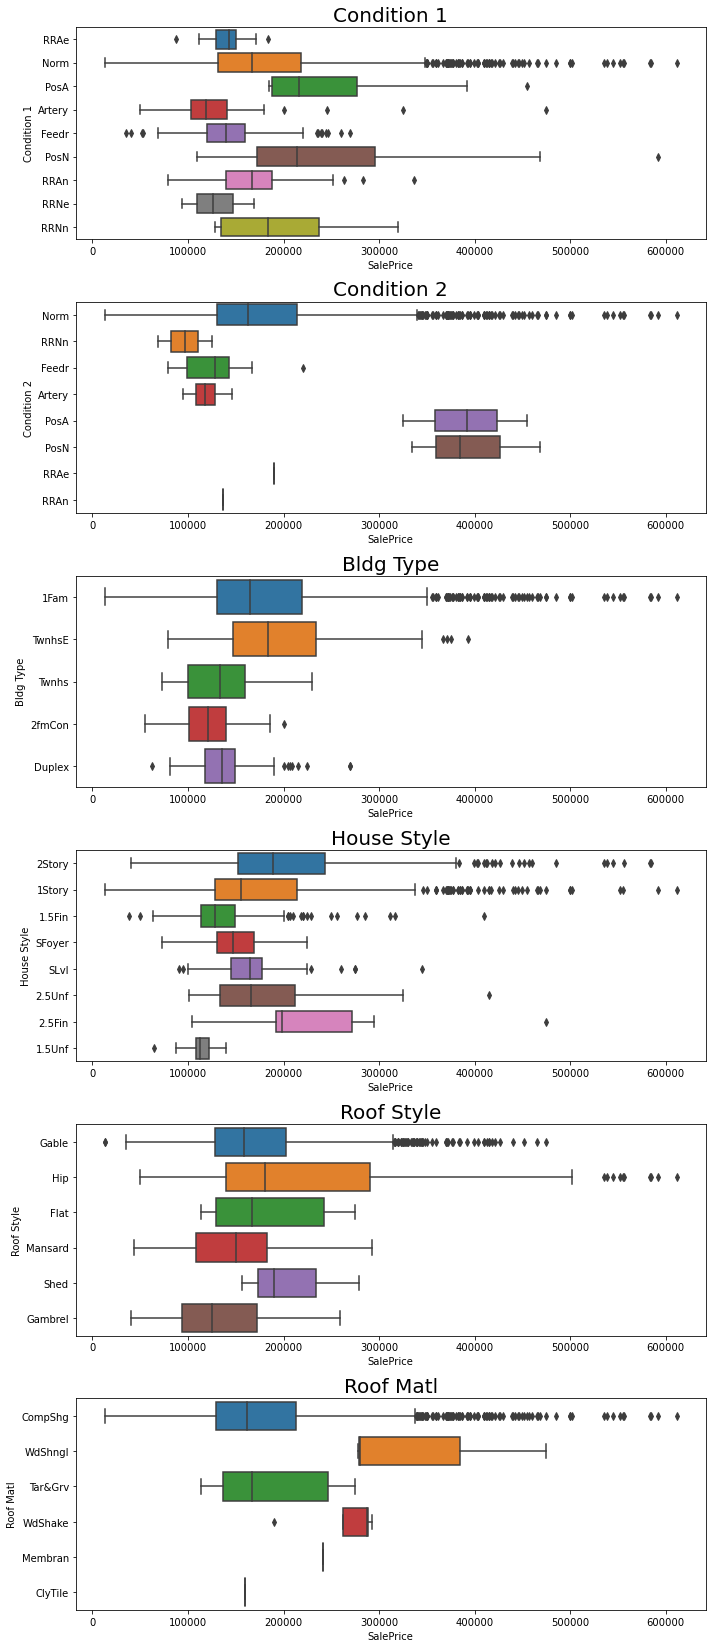

In [26]:
fig = plt.figure()
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10, 23))
ax = ax.ravel()
    
for n, col in enumerate(categorical_cols[9:15]):
    g = sns.boxplot(data=train_df, y=col, x=target, ax=ax[n], orient='h')
    ax[n].set_title(col, fontsize=20)
    g.set(xticks=[0, 100000, 200000, 300000, 400000, 500000, 600000])
    plt.tight_layout()

Text(0.5, 1.0, 'Exterior 1st')

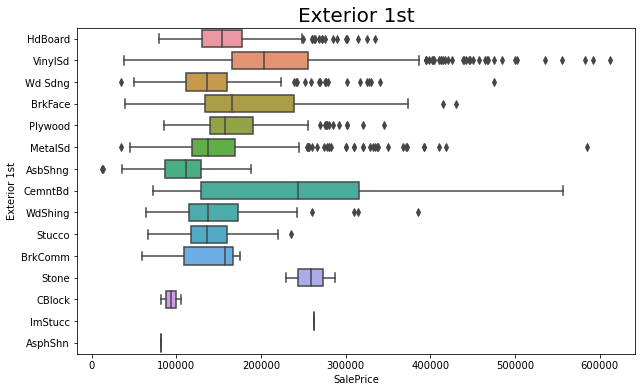

In [27]:
fig = plt.figure(figsize=(10, 6))
g = sns.boxplot(data=train_df, y=categorical_cols[15], x=target)
g.set(xticks=[0, 100000, 200000, 300000, 400000, 500000, 600000]);
g.set_title(categorical_cols[15], fontsize=20)

Text(0.5, 1.0, 'Exterior 2nd')

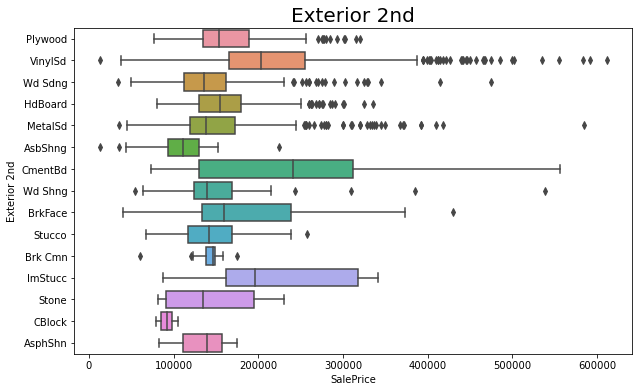

In [28]:
fig = plt.figure(figsize=(10, 6))
g = sns.boxplot(data=train_df, y=categorical_cols[16], x=target)
g.set(xticks=[0, 100000, 200000, 300000, 400000, 500000, 600000]);
g.set_title(categorical_cols[16], fontsize=20)

<Figure size 432x288 with 0 Axes>

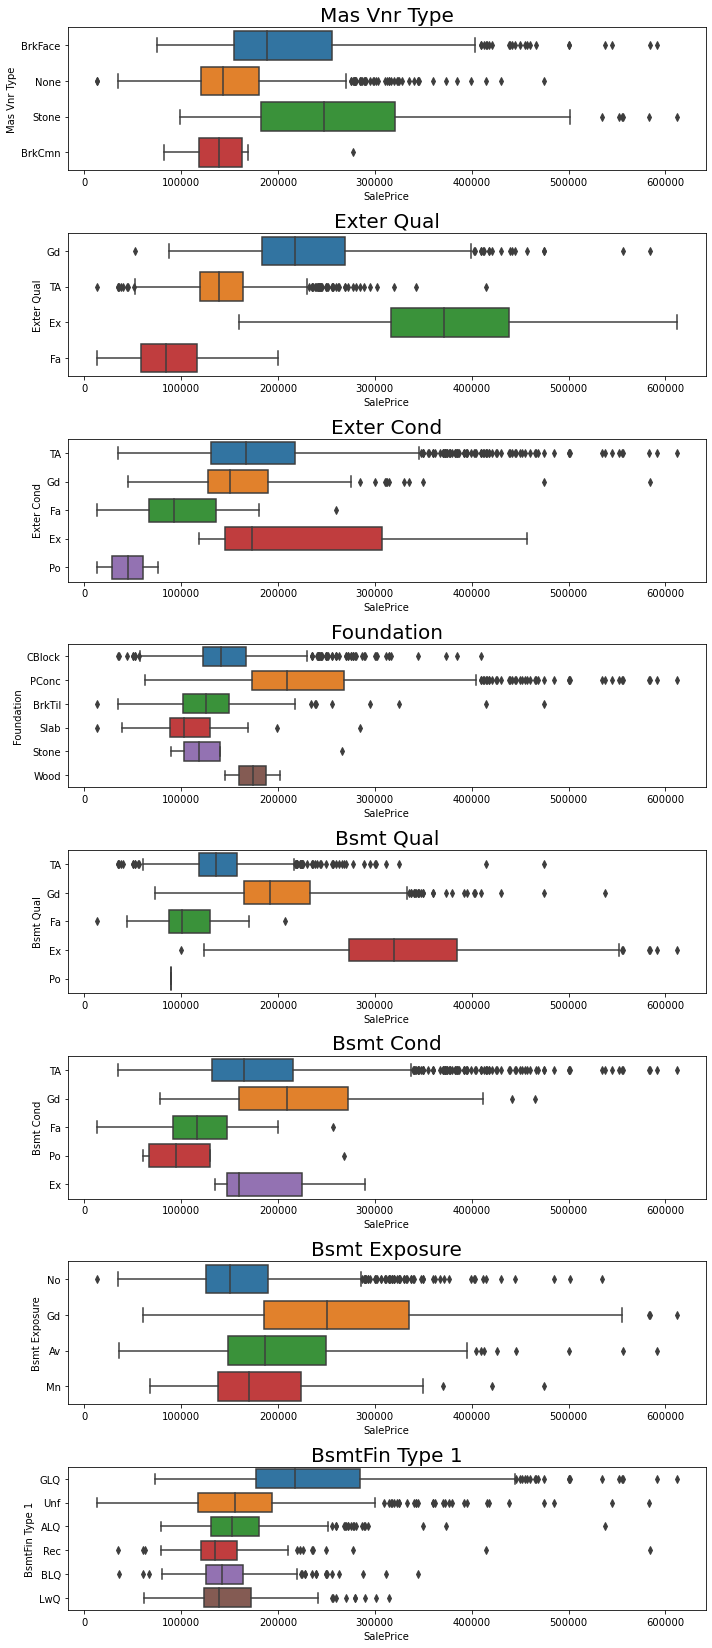

In [29]:
fig = plt.figure()
fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(10, 23))
ax = ax.ravel()
    
for n, col in enumerate(categorical_cols[17:25]):
    g = sns.boxplot(data=train_df, y=col, x=target, ax=ax[n], orient='h')
    ax[n].set_title(col, fontsize=20)
    g.set(xticks=[0, 100000, 200000, 300000, 400000, 500000, 600000])
    plt.tight_layout()

<Figure size 432x288 with 0 Axes>

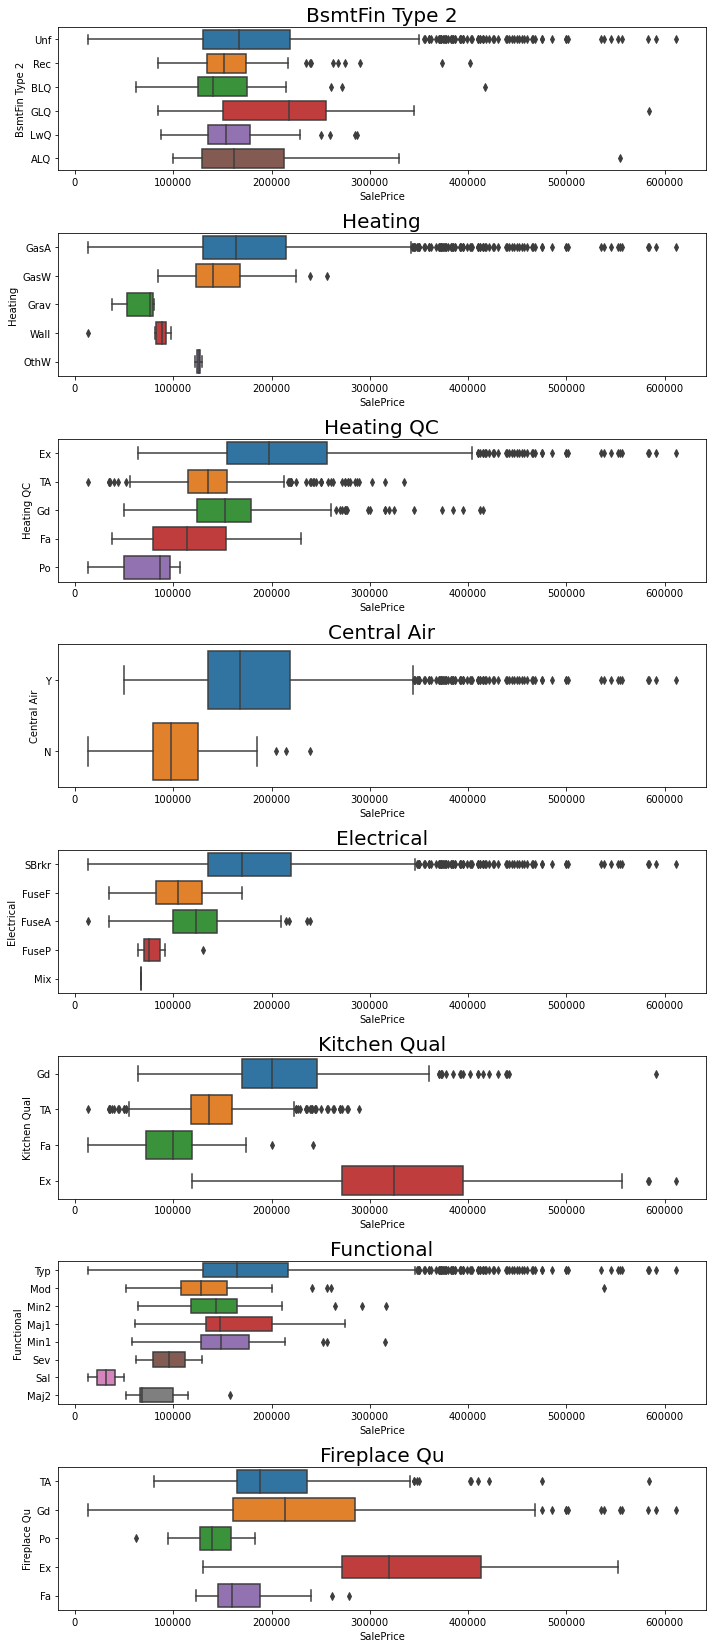

In [30]:
fig = plt.figure()
fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(10, 23))
ax = ax.ravel()
    
for n, col in enumerate(categorical_cols[25:33]):
    g = sns.boxplot(data=train_df, y=col, x=target, ax=ax[n], orient='h')
    ax[n].set_title(col, fontsize=20)
    g.set(xticks=[0, 100000, 200000, 300000, 400000, 500000, 600000])
    plt.tight_layout()

<Figure size 432x288 with 0 Axes>

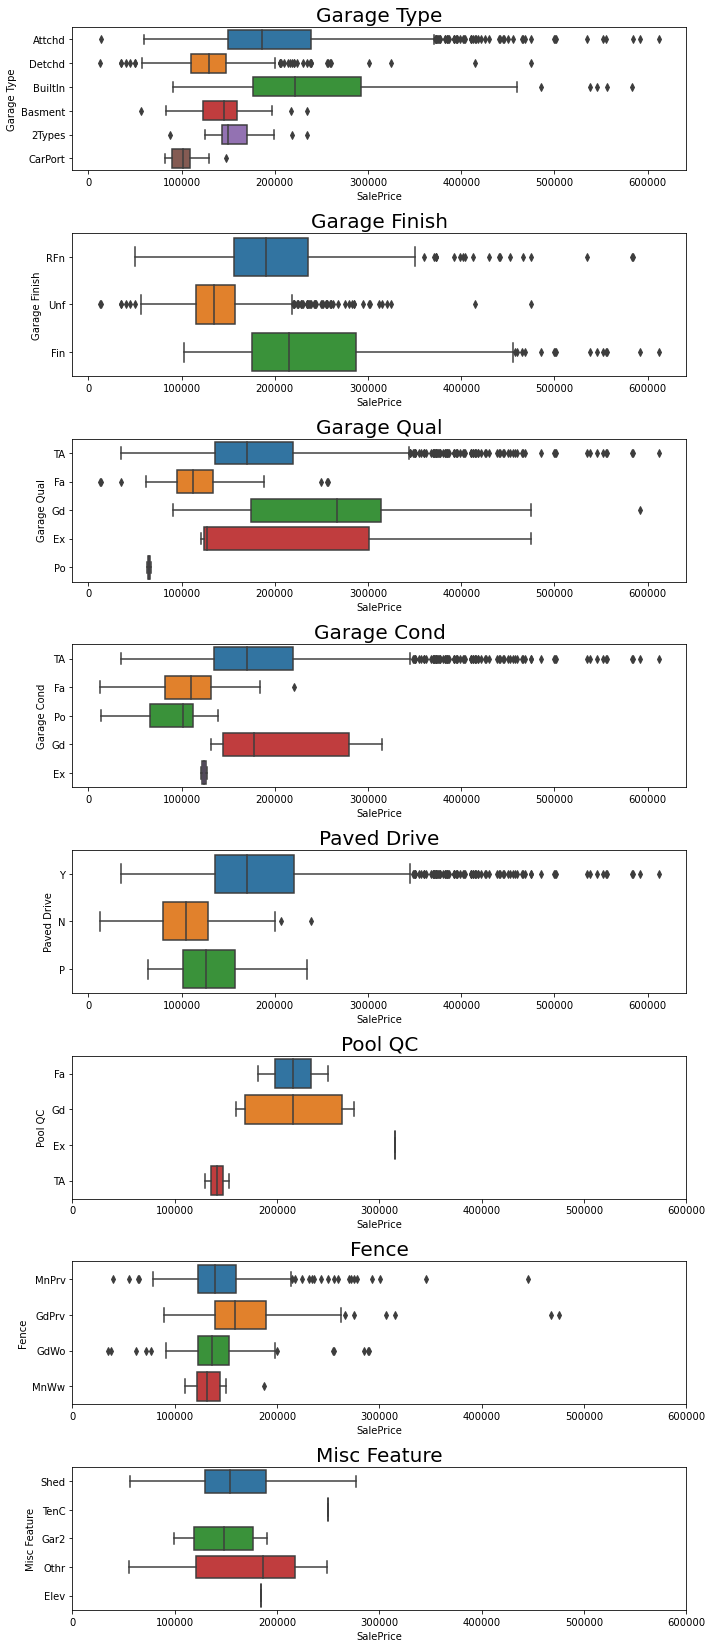

In [31]:
fig = plt.figure()
fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(10, 23))
ax = ax.ravel()
    
for n, col in enumerate(categorical_cols[33:41]):
    g = sns.boxplot(data=train_df, y=col, x=target, ax=ax[n], orient='h')
    ax[n].set_title(col, fontsize=20)
    g.set(xticks=[0, 100000, 200000, 300000, 400000, 500000, 600000])
    plt.tight_layout()

Text(0.5, 1.0, 'Sale Type')

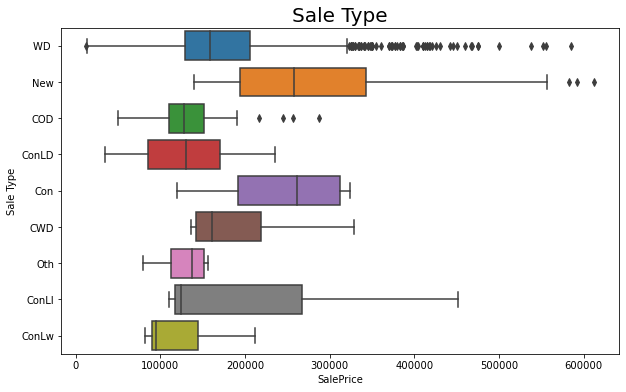

In [32]:
fig = plt.figure(figsize=(10, 6))
g = sns.boxplot(data=train_df, y=categorical_cols[41], x=target)
g.set(xticks=[0, 100000, 200000, 300000, 400000, 500000, 600000]);
g.set_title(categorical_cols[41], fontsize=20)

<center><h1>Data Cleaning</h1></center>
<h3>Objectives:</h3>
<ul>
    <li>Split columns and focus on categorical and numerical columns</li>
    <li>Work on cleaning these columns</li>
    <li>Combine data frames for dummification</li>
    <li>Providing values and meanings to missing values</li>
</ul><br>

In [33]:
# current columns with missing values

train_df.isnull().sum()[train_df.isnull().sum()!=0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [34]:
# current columns with missing values

test_df.isnull().sum()[test_df.isnull().sum()!=0]

Lot Frontage      160
Alley             820
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           874
Fence             706
Misc Feature      837
dtype: int64

<center><h2>Identifying Ordinal Columns, Null Values Analysis</h2></center><br>
<h3>Objectives:</h3>
<ul>
    <li>Identify columns with possible ordinal transformation</li>
    <li>Identify and analyze null values to assign values or drop</li>
    <li>Map Ordinal Dictionary to categories for dummification</li>
</ul><br>

<center><h3>Ordinal Dictionary</h3></center>

<h2>List of Converted Ordinal Columns:</h2>
<ul>
    <li>Bsmt Qual</li>
    <li>Bsmt Cond</li>
    <li>Fireplace Qu</li>
    <li>Garage Qual</li>
    <li>Garage Cond</li>
</ul>

|Value|Description|Ordinal Number|
|---|--|---|
|Ex|Excellent|5|
|Gd|Good|4|
|TA|Average|3|
|Fa|Fair|2|
|Po|Poor|1|
|NA|No <-->|0|

<ul>
    <li>Exter Qual</li>
    <li>Exter Cond</li>
    <li>HeatingQC</li>
    <li>Kichen Qual</li>
</ul>

|Value|Description|Ordinal Number|
|---|--|---|
|Ex|Excellent|4|
|Gd|Good|3|
|TA|Average|2|
|Fa|Fair|1|
|Po|Poor|0|

<ul>
    <li>Bsmt Exposure</li>
</ul>

|Value|Description|Ordinal Number|
|---|--|---|
|Gd|Good Exposure|4|
|Av|Average Exposure|3|
|Mn|Minimum Exposure|2|
|No|No Exposure|1|
|NA|No Basement|0|

<ul>
    <li>Pool QC</li>
</ul>

|Value|Description|Ordinal Number|
|---|--|---|
|Ex|Excellent|4|
|Gd|Good|3|
|TA|Average/Typical|2|
|Fa|Fair|1|
|NA|No No Pool|0|

<ul>
    <li>Lot Shape</li>
</ul>

|Value|Description|Ordinal Number|
|---|--|---|
|Reg|Regular|3|	
|IR1|Slightly irregular|2|
|IR2|Moderately Irregular|1|
|IR3|Irregular|0|

<ul>
    <li>Utilities</li>
</ul>

|Value|Description|Ordinal Number|
|---|--|---|
|AllPub|All public Utilities (E,G,W,& S)|3|	
|NoSewr|Electricity, Gas, and Water (Septic Tank)|2|
|NoSeWa|Electricity and Gas Only|1|
|ELO|Irregular|0|

<ul>
    <li>Land Slope</li>
</ul>

|Value|Description|Ordinal Number|
|---|--|---|	
|Gtl|Gentle slope|2|
|Mod|Moderate Slope|1|
|Sev|Severe Slope|0|

<ul>
    <li>BsmtFin Type 1</li>
    <li>BsmtFin Type 2</li>
</ul>

|Value|Description|Ordinal Number|
|---|--|---|	
|GLQ|Good Living Quarters|6|
|ALQ|Average Living Quarters|5|
|BLQ|Below Average Living Quarters|4|
|Rec|Average Rec Room|3|
|LwQ|Low Quality|2|
|Unf|Unfinished|1|
|NA|No Basement|0|

<ul>
    <li>Electrical</li>
</ul>

|Value|Description|Ordinal Number|
|---|--|---|	
|SBrkr|Standard Circuit Breakers & Romex|4|
|FuseA|Fuse Box over 60 AMP and all Romex wiring (Average)|3|
|FuseF|60 AMP Fuse Box and mostly Romex wiring (Fair)|2|
|FuseP|60 AMP Fuse Box and mostly knob & tube wiring (poor)|1|
|Mix|Mixed|0|

<ul>
    <li>Functional</li>
</ul>

|Value|Description|Ordinal Number|
|---|--|---|	
|Typ|Typical Functionality|7|
|Min1|Minor Deductions 1|6|
|Min2|Minor Deductions 2|5|
|Mod|Moderate Deductions|4|
|Maj1|Major Deductions 1|3|
|Maj2|Major Deductions 2|2|
|Sev|Severely Damaged|1|
|Sal|Salvage only|0|

<ul>
    <li>Garage Finish</li>
</ul>

|Value|Description|Ordinal Number|
|---|--|---|	
|Fin|Finished|3|
|Rfn|Rough Finished|2|
|Unf|Unfinished|1|
|NA|No Garage|0|

<ul>
    <li>Paved Drive</li>
</ul>

|Value|Description|Ordinal Number|
|---|--|---|	
|Y|Paved|2|
|P|Partial Pavement|1|
|N|Dirt/Gravel|0|

<ul>
    <li>Fence</li>
</ul>

|Value|Description|Ordinal Number|
|---|--|---|
|GdPrv|Good Privacy|4|
|MnPrv|Minimum Privacy|3|
|GdWo|Good Wood|2|
|MnWw|Minimum Wood/Wire|1|
|NA|No Fence|0|

<h2>Transforming Ordinal Numbers</h2><br>
Mapping columns to the dictionaries below to transform data into ordinal.<br>
<b>Refer to previous section for full ordinal information</b><br>
Even though there are some categorical columns that are ordinal (possible to map), there are some which are nominal.

<h2>Filling Up 'None' Values</h2><br>
I have noticed that most of the NA values actually represent something. It could mean the absence of, for example, a pool, or things like no basement. For obvious reasons, all these are actually important data that can affect the <code>SalePrice</code> of a house. As such, we should convert null values to an actual 'None' value to be mapped later.

In [35]:
# construct mapping dictionary for ordinal number mapping

trans_ordinal_dict_1 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
trans_ordinal_dict_2 = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}

ordinal_dict_bsmt_exposure = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
ordinal_dict_pool_qc = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'None': 0}

ordinal_dict_lot_shape = {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}
ordinal_dict_utilities = {'AllPub': 2, 'NoSewr': 1, 'NoSeWa': 0}
ordinal_dict_land_slope = {'Gtl': 2, 'Mod': 1, 'Sev': 0}

ordinal_dict_bsmtfin = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}
ordinal_dict_electrical = {'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0}
ordinal_dict_functional = {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}

ordinal_dict_garage_finish = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}
ordinal_dict_paved_drive = {'Y': 2, 'P': 1, 'N': 0}
ordinal_dict_fence = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'None': 0}

<code>Pool QC</code>, <code>Fence</code>, <code>Alley</code>
<ul>
    <li>Pool QC - NA represents No Pool</li>
    <li>Fence - NA represents No Alley Access</li>
    <li>Alley - NA represents No Alley Access</li>
</ul>

In [36]:
train_df['Pool QC'] = train_df['Pool QC'].fillna('None')
train_df['Pool QC'] = train_df['Pool QC'].map(ordinal_dict_pool_qc)

train_df['Fence'] = train_df['Fence'].fillna('None')
train_df['Fence'] = train_df['Fence'].map(ordinal_dict_fence)

train_df['Alley'] = train_df['Alley'].fillna('None')

In [37]:
test_df['Pool QC'] = test_df['Pool QC'].fillna('None')
test_df['Pool QC'] = test_df['Pool QC'].map(ordinal_dict_pool_qc)


test_df['Fence'] = test_df['Fence'].fillna('None')
test_df['Fence'] = test_df['Fence'].map(ordinal_dict_fence)

test_df['Alley'] = test_df['Alley'].fillna('None')

<code>Garage Type</code>, <code>Garage Finish</code>, <code>Garage Qual</code>, <code>Garage Cond</code>
<ul>
    <li>Garage Type - NA represents No Garage</li>
    <li>Garage Finish - NA represents No Garage</li>
    <li>Garage Qual - NA represents No Garage</li>
    <li>Garage Cond - NA represents No Garage</li>
</ul>

In [38]:
train_df['Garage Type'] = train_df['Garage Type'].fillna('None')

train_df['Garage Finish'] = train_df['Garage Finish'].fillna('None')
train_df['Garage Finish'] = train_df['Garage Finish'].map(ordinal_dict_garage_finish)

train_df['Garage Qual'] = train_df['Garage Qual'].fillna('None')
train_df['Garage Qual'] = train_df['Garage Qual'].map(trans_ordinal_dict_1)

train_df['Garage Cond'] = train_df['Garage Cond'].fillna('None')
train_df['Garage Cond'] = train_df['Garage Cond'].map(trans_ordinal_dict_1)

In [39]:
test_df['Garage Type'] = test_df['Garage Type'].fillna('None')

test_df['Garage Finish'] = test_df['Garage Finish'].fillna('None')
test_df['Garage Finish'] = test_df['Garage Finish'].map(ordinal_dict_garage_finish)

test_df['Garage Qual'] = test_df['Garage Qual'].fillna('None')
test_df['Garage Qual'] = test_df['Garage Qual'].map(trans_ordinal_dict_1)

test_df['Garage Cond'] = test_df['Garage Cond'].fillna('None')
test_df['Garage Cond'] = test_df['Garage Cond'].map(trans_ordinal_dict_1)

<code>Bsmt Qual</code>, <code>Bsmt Cond</code>, <code>Bsmt Exposure</code>
<ul>
    <li>Bsmt Qual - NA represents No Basement</li>
    <li>Bsmt Cond - NA represents No Basement</li>
    <li>Bsmt Exposure - NA represents No Basement</li>
</ul>

In [40]:
train_df['Bsmt Qual'] = train_df['Bsmt Qual'].fillna('None')
train_df['Bsmt Cond'] = train_df['Bsmt Cond'].fillna('None')
train_df['Bsmt Exposure'] = train_df['Bsmt Exposure'].fillna('None')

In [41]:
test_df['Bsmt Qual'] = test_df['Bsmt Qual'].fillna('None')
test_df['Bsmt Cond'] = test_df['Bsmt Cond'].fillna('None')
test_df['Bsmt Exposure'] = test_df['Bsmt Exposure'].fillna('None')

<code>BsmtFin Type 1</code>, <code>BsmtFin Type 2</code>
<ul>
    <li>BsmtFin Type 1 - NA represents No Basement</li>
    <li>BsmtFin Type 2 - NA represents No Basement</li>
</ul>

In [42]:
train_df['BsmtFin Type 1'] = train_df['BsmtFin Type 1'].fillna('None')
train_df['BsmtFin Type 2'] = train_df['BsmtFin Type 2'].fillna('None')

In [43]:
test_df['BsmtFin Type 1'] = test_df['BsmtFin Type 1'].fillna('None')
test_df['BsmtFin Type 2'] = test_df['BsmtFin Type 2'].fillna('None')

<code>Fireplace Qu</code>, <code>Misc Feature</code>
<ul>
    <li>Fireplace Qu - NA represents No Fireplace</li>
    <li>Misc Feature - NA represents No Misc Feature</li>
</ul>

In [44]:
train_df['Fireplace Qu'] = train_df['Fireplace Qu'].fillna('None')
train_df['Fireplace Qu'] = train_df['Fireplace Qu'].map(trans_ordinal_dict_1)

train_df['Misc Feature'] = train_df['Misc Feature'].fillna('None')

In [45]:
test_df['Fireplace Qu'] = test_df['Fireplace Qu'].fillna('None')
test_df['Fireplace Qu'] = test_df['Fireplace Qu'].map(trans_ordinal_dict_1)

test_df['Misc Feature'] = test_df['Misc Feature'].fillna('None')

<code>Mas Vnr Type</code>
<ul>
    <li>Mas Vnr Type - NA represents None</li>
</ul>

In [46]:
train_df['Mas Vnr Type'] = train_df['Mas Vnr Type'].fillna('None')

In [47]:
test_df['Mas Vnr Type'] = test_df['Mas Vnr Type'].fillna('None')

<code>Electrical</code><br>
There is a single, trailing null value for a 1 row in <code>test_df</code>, I will proceed to assign the most common value instead.

In [48]:
test_df['Electrical'].value_counts(normalize=True)

SBrkr    0.927024
FuseA    0.054732
FuseF    0.017104
FuseP    0.001140
Name: Electrical, dtype: float64

In [49]:
test_df.loc[test_df[test_df['Electrical'].isnull()].index, 'Electrical'] = 'SBrkr'

<h3>Fill in 0.0 for Discrete Columns</h3>
The values are 0.0 because there are examples in which there is no garage, therefore these values can be computed to 0.0.

In [50]:
train_df['Bsmt Full Bath'] = train_df['Bsmt Full Bath'].fillna(0.0)
train_df['Bsmt Half Bath'] = train_df['Bsmt Half Bath'].fillna(0.0)
train_df['BsmtFin SF 1'] = train_df['BsmtFin SF 1'].fillna(0)
train_df['BsmtFin SF 2'] = train_df['BsmtFin SF 2'].fillna(0)
train_df['Bsmt Unf SF'] = train_df['Bsmt Unf SF'].fillna(0)
train_df['Total Bsmt SF'] = train_df['Total Bsmt SF'].fillna(0)

In [51]:
test_df['Bsmt Full Bath'] = test_df['Bsmt Full Bath'].fillna(0.0)
test_df['Bsmt Half Bath'] = test_df['Bsmt Half Bath'].fillna(0.0)
test_df['BsmtFin SF 1'] = test_df['BsmtFin SF 1'].fillna(0)
test_df['BsmtFin SF 2'] = test_df['BsmtFin SF 2'].fillna(0)
test_df['Bsmt Unf SF'] = test_df['Bsmt Unf SF'].fillna(0)
test_df['Total Bsmt SF'] = test_df['Total Bsmt SF'].fillna(0)

In [52]:
train_df['Garage Yr Blt'] = train_df['Garage Yr Blt'].fillna(0.0)
train_df['Garage Area'] = train_df['Garage Area'].fillna(0.0)
train_df['Garage Cars'] = train_df['Garage Cars'].fillna(0.0)

In [53]:
test_df['Garage Yr Blt'] = test_df['Garage Yr Blt'].fillna(0.0)
test_df['Garage Area'] = test_df['Garage Area'].fillna(0.0)
test_df['Garage Cars'] = test_df['Garage Cars'].fillna(0.0)

In [54]:
train_df['Lot Frontage'] = train_df['Lot Frontage'].fillna(0.0)
train_df['Mas Vnr Area'] = train_df['Mas Vnr Area'].fillna(0.0)

In [55]:
train_df['Lot Frontage'] = train_df['Lot Frontage'].fillna(0.0)
train_df['Mas Vnr Area'] = train_df['Mas Vnr Area'].fillna(0.0)

In [56]:
test_df['Lot Frontage'] = test_df['Lot Frontage'].fillna(0.0)
test_df['Mas Vnr Area'] = test_df['Mas Vnr Area'].fillna(0.0)

<h3>Proceed to map Ordinal columns</h3>

In [57]:
train_df['Bsmt Qual'] = train_df['Bsmt Qual'].map(trans_ordinal_dict_1)
train_df['Bsmt Cond'] = train_df['Bsmt Cond'].map(trans_ordinal_dict_1)
train_df['Bsmt Exposure'] = train_df['Bsmt Exposure'].map(ordinal_dict_bsmt_exposure)
train_df['BsmtFin Type 1'] = train_df['BsmtFin Type 1'].map(ordinal_dict_bsmtfin)
train_df['BsmtFin Type 2'] = train_df['BsmtFin Type 2'].map(ordinal_dict_bsmtfin)

In [58]:
train_df['Lot Shape'] = train_df['Lot Shape'].map(ordinal_dict_lot_shape)
train_df['Land Slope'] = train_df['Land Slope'].map(ordinal_dict_land_slope)

In [59]:
train_df['Utilities'] = train_df['Utilities'].map(ordinal_dict_utilities)
train_df['Heating QC'] = train_df['Heating QC'].map(trans_ordinal_dict_2)
train_df['Electrical'] = train_df['Electrical'].map(ordinal_dict_electrical)

In [60]:
train_df['Exter Qual'] = train_df['Exter Qual'].map(trans_ordinal_dict_2)
train_df['Exter Cond'] = train_df['Exter Cond'].map(trans_ordinal_dict_2)
train_df['Kitchen Qual'] = train_df['Kitchen Qual'].map(trans_ordinal_dict_2)

In [61]:
train_df['Functional'] = train_df['Functional'].map(ordinal_dict_functional)
train_df['Paved Drive'] = train_df['Paved Drive'].map(ordinal_dict_paved_drive)

In [62]:
test_df['Bsmt Qual'] = test_df['Bsmt Qual'].map(trans_ordinal_dict_1)
test_df['Bsmt Cond'] = test_df['Bsmt Cond'].map(trans_ordinal_dict_1)
test_df['Bsmt Exposure'] = test_df['Bsmt Exposure'].map(ordinal_dict_bsmt_exposure)
test_df['BsmtFin Type 1'] = test_df['BsmtFin Type 1'].map(ordinal_dict_bsmtfin)
test_df['BsmtFin Type 2'] = test_df['BsmtFin Type 2'].map(ordinal_dict_bsmtfin)

In [63]:
test_df['Lot Shape'] = test_df['Lot Shape'].map(ordinal_dict_lot_shape)
test_df['Land Slope'] = test_df['Land Slope'].map(ordinal_dict_land_slope)

In [64]:
test_df['Utilities'] = test_df['Utilities'].map(ordinal_dict_utilities)
test_df['Heating QC'] = test_df['Heating QC'].map(trans_ordinal_dict_2)
test_df['Electrical'] = test_df['Electrical'].map(ordinal_dict_electrical)

In [65]:
test_df['Exter Qual'] = test_df['Exter Qual'].map(trans_ordinal_dict_2)
test_df['Exter Cond'] = test_df['Exter Cond'].map(trans_ordinal_dict_2)
test_df['Kitchen Qual'] = test_df['Kitchen Qual'].map(trans_ordinal_dict_2)

In [66]:
test_df['Functional'] = test_df['Functional'].map(ordinal_dict_functional)
test_df['Paved Drive'] = test_df['Paved Drive'].map(ordinal_dict_paved_drive)

In [67]:
# check any trailing null values left

train_df.isnull().sum().max()

0

In [68]:
# check any trailing null values left

test_df.isnull().sum().max()

0

In [69]:
# check any trailing null values left

train_null_list = train_df.columns[train_df.isna().any()].tolist()
train_null_list

[]

In [70]:
# check any trailing null values left

test_null_list = test_df.columns[test_df.isna().any()].tolist()
test_null_list

[]

In [71]:
# check shape

train_df.shape

(2051, 81)

In [72]:
# check shape

train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,None,2,Lvl,2,CulDSac,2,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3,2,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,4,Y,4,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,7,0,0,Attchd,1976.0,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,2,Lvl,2,CulDSac,2,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3,2,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,4,Y,4,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,7,1,3,Attchd,1997.0,2,2.0,559.0,3,3,2,0,74,0,0,0,0,0,0,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,3,Lvl,2,Inside,2,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,2,Y,4,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,7,0,0,Detchd,1953.0,1,1.0,246.0,3,3,2,0,52,0,0,0,0,0,0,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,3,Lvl,2,Inside,2,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,3,Y,4,744,700,0,1444,0.0,0.0,2,1,3,1,2,7,7,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,2,100,0,0,0,0,0,0,0,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,2,Lvl,2,Inside,2,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2,2,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,2,Y,4,831,614,0,1445,0.0,0.0,2,0,3,1,2,6,7,0,0,Detchd,1957.0,1,2.0,484.0,3,3,0,0,59,0,0,0,0,0,0,None,0,3,2010,WD,138500


In [73]:
# check shape

test_df.shape

(878, 80)

In [74]:
# check shape

test_df.tail()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
873,1662,527377110,60,RL,80.0,8000,Pave,None,3,Lvl,2,Inside,2,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3,3,1,5,931,2,153,0,1084,GasA,2,Y,4,1084,793,0,1877,1,0,2,1,4,1,2,8,7,1,3,Attchd,1974.0,1,2,488,3,3,2,0,96,0,0,0,0,0,0,None,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,None,3,Lvl,2,Inside,2,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,3,3,CBlock,3,3,1,4,575,1,0,529,1104,GasA,4,Y,4,1104,884,0,1988,0,0,2,1,4,1,3,9,7,1,4,Attchd,1966.0,2,2,480,3,3,2,0,230,0,0,0,0,0,3,None,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,None,3,Lvl,2,Inside,2,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3,3,1,4,250,2,492,210,952,GasA,4,Y,4,1211,0,0,1211,0,0,1,0,3,1,2,5,7,1,3,Attchd,1968.0,1,1,322,3,3,2,0,63,0,0,0,0,0,0,None,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,None,3,Lvl,2,FR2,2,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,PConc,3,3,1,5,616,1,0,248,864,GasA,2,Y,4,864,0,0,864,0,0,1,0,3,1,2,5,7,0,0,Detchd,1974.0,1,2,528,3,3,2,0,0,0,0,0,0,0,2,None,0,5,2007,WD
877,1939,535327160,20,RL,70.0,8400,Pave,None,3,Lvl,2,Corner,2,NAmes,Norm,Norm,1Fam,1Story,5,5,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,3,CBlock,3,3,1,4,793,1,0,130,923,GasA,2,Y,4,925,0,0,925,1,0,1,0,3,1,2,5,7,2,3,Attchd,1955.0,1,1,390,3,3,2,81,0,0,0,0,0,0,2,None,0,3,2007,WD


<center><h1>Combine <code>train_df</code> and <code>test_df</code> for Creating Dummies</h1></center>

The purpose of combining <code>train_df</code> and <code>test_df</code> is to ensure that all possible values are covered. I found it the hard way that there are some values in specific columns found in <code>test_df</code> and not in <code>train_df</code>, and to ensure that all columns are covered during dummification, combining the data frames can help a lot.

In [75]:
# concat to combine

df_combine = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [76]:
# check shape

df_combine.shape

(2929, 81)

In [77]:
# check row indexes

df_combine.tail()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2924,1662,527377110,60,RL,80.0,8000,Pave,None,3,Lvl,2,Inside,2,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3,3,1,5,931.0,2,153.0,0.0,1084.0,GasA,2,Y,4,1084,793,0,1877,1.0,0.0,2,1,4,1,2,8,7,1,3,Attchd,1974.0,1,2.0,488.0,3,3,2,0,96,0,0,0,0,0,0,None,0,11,2007,WD,NaN
2925,1234,535126140,60,RL,90.0,14670,Pave,None,3,Lvl,2,Inside,2,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,3,3,CBlock,3,3,1,4,575.0,1,0.0,529.0,1104.0,GasA,4,Y,4,1104,884,0,1988,0.0,0.0,2,1,4,1,3,9,7,1,4,Attchd,1966.0,2,2.0,480.0,3,3,2,0,230,0,0,0,0,0,3,None,0,8,2008,WD,NaN
2926,1373,904100040,20,RL,55.0,8250,Pave,None,3,Lvl,2,Inside,2,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,2,2,CBlock,3,3,1,4,250.0,2,492.0,210.0,952.0,GasA,4,Y,4,1211,0,0,1211,0.0,0.0,1,0,3,1,2,5,7,1,3,Attchd,1968.0,1,1.0,322.0,3,3,2,0,63,0,0,0,0,0,0,None,0,8,2008,WD,NaN
2927,1672,527425140,20,RL,60.0,9000,Pave,None,3,Lvl,2,FR2,2,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,2,2,PConc,3,3,1,5,616.0,1,0.0,248.0,864.0,GasA,2,Y,4,864,0,0,864,0.0,0.0,1,0,3,1,2,5,7,0,0,Detchd,1974.0,1,2.0,528.0,3,3,2,0,0,0,0,0,0,0,2,None,0,5,2007,WD,NaN
2928,1939,535327160,20,RL,70.0,8400,Pave,None,3,Lvl,2,Corner,2,NAmes,Norm,Norm,1Fam,1Story,5,5,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,3,CBlock,3,3,1,4,793.0,1,0.0,130.0,923.0,GasA,2,Y,4,925,0,0,925,1.0,0.0,1,0,3,1,2,5,7,2,3,Attchd,1955.0,1,1.0,390.0,3,3,2,81,0,0,0,0,0,0,2,None,0,3,2007,WD,NaN


<p>One-hot encoding for all other columns - create dummies</p>

In [78]:
obj_features = [col for col in df_combine.select_dtypes(include=['category', 'object']).columns]
obj_features

['MS Zoning',
 'Street',
 'Alley',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type',
 'Misc Feature',
 'Sale Type']

In [79]:
df_combine = pd.get_dummies(data=df_combine, columns=obj_features, drop_first=True)

Output and save our Data Frames

In [80]:
df_combine.to_csv('../datasets/df_combine_clean.csv', index=False)

<center><h2>Feature Engineering</h2></center><br>
<h3>Objectives:</h3>
<ul>
    <li>Identify noticable correlations to add into X features</li>
    <li>Find interactions, drop columns, etc</li>
    <li>Remove noise features</li>
</ul><br>


In [81]:
# check shape

df_combine.shape

(2929, 207)

In [82]:
# check any new correlation with dummies

df_combine.corr()['SalePrice'].sort_values(ascending=False).head(30)

SalePrice               1.000000
Overall Qual            0.800207
Exter Qual              0.712146
Gr Liv Area             0.697038
Kitchen Qual            0.692336
Garage Area             0.649897
Garage Cars             0.647781
Total Bsmt SF           0.629303
1st Flr SF              0.618486
Bsmt Qual               0.612188
Year Built              0.571849
Garage Finish           0.557839
Year Remod/Add          0.550370
Fireplace Qu            0.538925
Full Bath               0.537969
Foundation_PConc        0.529047
TotRms AbvGrd           0.504014
Mas Vnr Area            0.503579
Fireplaces              0.471093
Heating QC              0.458354
Neighborhood_NridgHt    0.448647
Bsmt Exposure           0.424863
BsmtFin SF 1            0.423856
Sale Type_New           0.358102
Garage Type_Attchd      0.357879
BsmtFin Type 1          0.350362
Exterior 1st_VinylSd    0.342146
Exterior 2nd_VinylSd    0.337563
Open Porch SF           0.333476
Wood Deck SF            0.326490
Name: Sale

<p><h3>We can see here that there are additional correlations added by our dummies in relation to <code>SalePrice</code>.</h3></p>

<code>Fireplace Qu</code>, <code>Heating QC</code> and <code>Foundation</code> have gone up the charts after we have dummified.

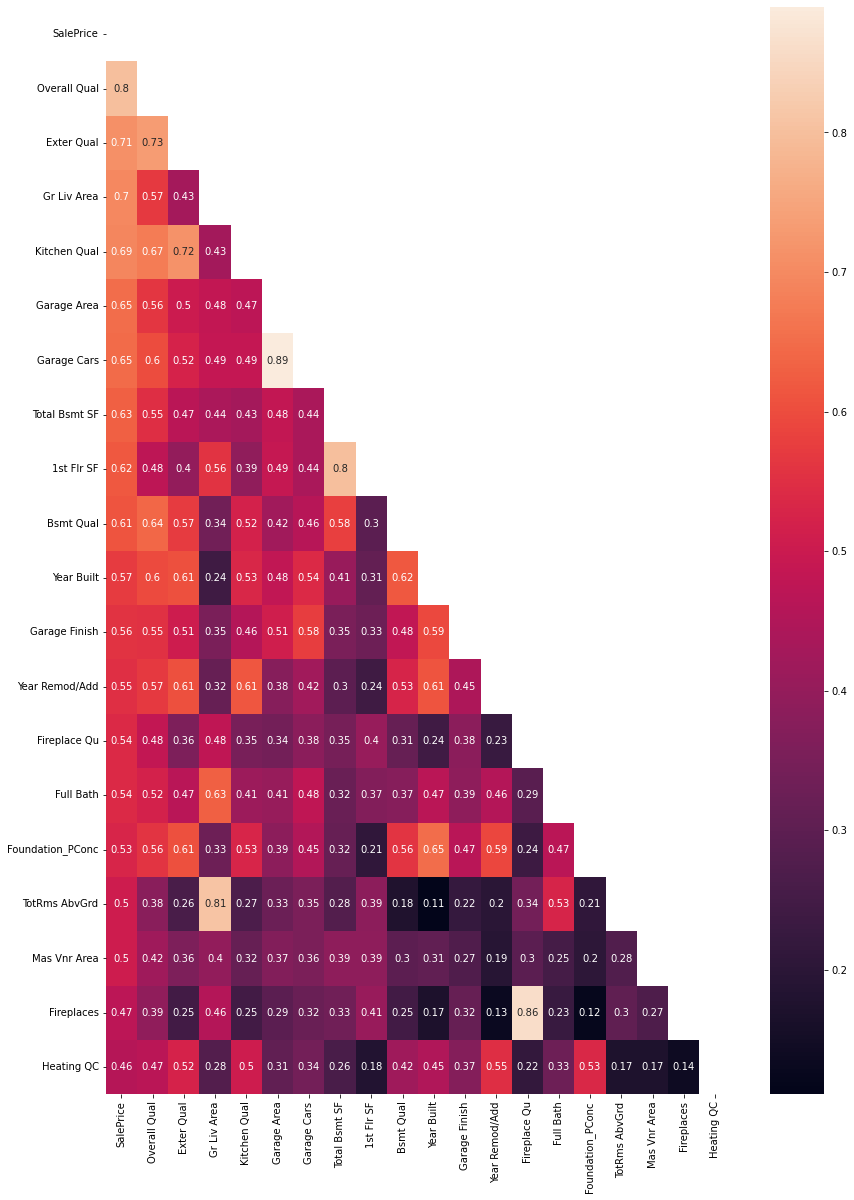

In [83]:
df_combine_corr = np.abs(df_combine.corr()['SalePrice'].sort_values(ascending=False)).head(20).index
plt.figure(figsize=(14,20))
mask = np.triu(np.ones_like(df_combine_corr))
ax = sns.heatmap(df_combine[df_combine_corr].corr(), mask=mask, annot=True)

<center><h2>Interaction</h2></center>

<p>Feature Engineering is the process of selecting, manipulating and transforming raw data into features. With Kaggle's Data Dictionary made publicly opened, there could be some features that could be better. I have tried several combinations and found out that the followings are effective for the model. Many of them are drafted with common sense, but were further supported by the results of my models.</p>

<ul>
<li><h3>Total SF = Total Bsmt SF + 1st Flr SF + 2nd Flr SF</h3></li>
<li><h3>Total Bath = Full Bath + Bsmt Full Bath + Half Bath + Bsmt Half Bath</h3></li>
<li><h3>House Age = Year Remod/Add + Year Built</h3></li>    
</ul>

<p>It is intuitive to think that people would be interested in total square feet of the whole house instead, and also how long has the house been around ever since it was built/renovated.</p>

In [84]:
df_combine['Total SF'] = df_combine['Total Bsmt SF'] + df_combine['1st Flr SF'] + df_combine['2nd Flr SF']

In [85]:
df_combine.drop(columns=['Total Bsmt SF', '1st Flr SF', '2nd Flr SF'], inplace=True)

In [86]:
df_combine['Total Bath'] = df_combine['Full Bath'] + df_combine['Bsmt Full Bath'] + ((df_combine['Half Bath'] + df_combine['Bsmt Half Bath']/2))

In [87]:
df_combine.drop(columns=['Full Bath', 'Bsmt Full Bath', 'Half Bath', 'Bsmt Half Bath'], inplace=True)

In [88]:
df_combine['House Age'] = df_combine['Year Remod/Add'] - df_combine['Year Built']

In [89]:
df_combine.drop(columns=['Year Remod/Add', 'Year Built'], inplace=True)

<ul>
<li><h3>Garage Area</h3></li>
<code>Garage Cars</code> are directly related to <code>Garage Area</code>, and since <code>Garage Area</code> has less correlation, I have decided to drop it.
<li><h3>Garage Yr Blt</h3></li>
Similar to <code>Year Built</code>, so it is dropped.

<li><h3>Mo Sold</h3></li>
Dropping Time columns as our features do not compute Time.
<li><h3>Yr Sold</h3></li>    
Dropping Time columns as our features do not compute Time.
</ul>

In [90]:
df_combine.drop(columns=['Garage Area'], inplace=True)

In [91]:
df_combine.drop('Garage Yr Blt', axis=1, inplace=True)

In [92]:
df_combine.drop('Mo Sold', axis=1, inplace=True)

In [93]:
df_combine.drop('Yr Sold', axis=1, inplace=True)

In [94]:
# check shape

df_combine.shape

(2929, 197)

We can see that <code>Total SF</code> is highly correlated to <code>SalePrice</code>.

In [95]:
# check any new correlation after interaction

df_combine.corr()['SalePrice'].sort_values(ascending=False).head(30)

SalePrice               1.000000
Overall Qual            0.800207
Total SF                0.783108
Exter Qual              0.712146
Gr Liv Area             0.697038
Kitchen Qual            0.692336
Garage Cars             0.647781
Total Bath              0.620581
Bsmt Qual               0.612188
Garage Finish           0.557839
Fireplace Qu            0.538925
Foundation_PConc        0.529047
TotRms AbvGrd           0.504014
Mas Vnr Area            0.503579
Fireplaces              0.471093
Heating QC              0.458354
Neighborhood_NridgHt    0.448647
Bsmt Exposure           0.424863
BsmtFin SF 1            0.423856
Sale Type_New           0.358102
Garage Type_Attchd      0.357879
BsmtFin Type 1          0.350362
Exterior 1st_VinylSd    0.342146
Exterior 2nd_VinylSd    0.337563
Open Porch SF           0.333476
Wood Deck SF            0.326490
Mas Vnr Type_Stone      0.310026
Lot Area                0.296566
Paved Drive             0.290472
Garage Qual             0.285281
Name: Sale

<center><h1>Split <code>train_df</code> and <code>test_df</code> for Modelling</h1></center>

At last, we are at the final step, in which we would model our <code>train_df</code> and <code>test_df</code>. However, we would need to split our <code>df_combine</code> and check if the rows are fine.

In [96]:
# split by row index

train_df_clean = df_combine.iloc[:2051, :]

In [97]:
# check data

train_df_clean.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Heating QC,Electrical,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_None,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Total SF,Total Bath,House Age
0,109,533352170,60,0.0,13517,2,2,2,6,8,289.0,3,2,3,3,1,6,533.0,1,0.0,192.0,4,4,0,1479,3,1,3,6,7,0,0,2,2.0,3,3,2,0,44,0,0,0,0,0,0,0,130500.0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2204.0,3.0,29
1,544,531379050,60,43.0,11492,2,2,2,7,5,132.0,3,2,4,3,1,6,637.0,1,0.0,276.0,4,4,0,2122,4,1,3,8,7,1,3,2,2.0,3,3,2,0,74,0,0,0,0,0,0,0,220000.0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0

In [98]:
# compare data

train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,None,2,Lvl,2,CulDSac,2,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3,2,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,4,Y,4,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,7,0,0,Attchd,1976.0,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,2,Lvl,2,CulDSac,2,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3,2,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,4,Y,4,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,7,1,3,Attchd,1997.0,2,2.0,559.0,3,3,2,0,74,0,0,0,0,0,0,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,3,Lvl,2,Inside,2,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,2,Y,4,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,7,0,0,Detchd,1953.0,1,1.0,246.0,3,3,2,0,52,0,0,0,0,0,0,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,3,Lvl,2,Inside,2,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,3,Y,4,744,700,0,1444,0.0,0.0,2,1,3,1,2,7,7,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,2,100,0,0,0,0,0,0,0,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,2,Lvl,2,Inside,2,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2,2,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,2,Y,4,831,614,0,1445,0.0,0.0,2,0,3,1,2,6,7,0,0,Detchd,1957.0,1,2.0,484.0,3,3,0,0,59,0,0,0,0,0,0,None,0,3,2010,WD,138500


In [99]:
# split by row index

test_df_clean = df_combine.iloc[2051:, :]
test_df_clean.reset_index(drop=True, inplace=True)

In [100]:
# check data

test_df_clean.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Heating QC,Electrical,Low Qual Fin SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Alley_None,Alley_Pave,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Misc Feature_Gar2,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Total SF,Total Bath,House Age
0,2658,902301120,190,69.0,9142,3,2,2,6,8,0.0,2,1,2,3,1,1,0.0,1,0.0,1020.0,3,1,0,1928,4,2,1,9,7,0,0,1,1.0,1,1,2,0,60,112,0,0,0,0,0,0,NaN,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2948.0,2.0,40
1,2718,905108090,90,0.0,9662,2,2,2,5,4,0.0,2,2,4,3,1,1,0.0,1,0.0,1967.0,2,4,0,1967,6,2,2,10,7,0,0,3,2.0,3,3,2,170,0,0,0,0,0,0,0,0,NaN,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [101]:
# compare data

test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,3,Lvl,2,Inside,2,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,1,Stone,2,3,1,1,0,1,0,1020,1020,GasA,3,N,1,908,1020,0,1928,0,0,2,0,4,2,1,9,7,0,0,Detchd,1910.0,1,1,440,1,1,2,0,60,112,0,0,0,0,0,None,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,Pave,None,2,Lvl,2,Inside,2,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,2,2,CBlock,4,3,1,1,0,1,0,1967,1967,GasA,2,Y,4,1967,0,0,1967,0,0,2,0,6,2,2,10,7,0,0,Attchd,1977.0,3,2,580,3,3,2,170,0,0,0,0,0,0,0,None,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,None,2,Lvl,2,Inside,2,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,2,PConc,4,4,3,6,554,1,0,100,654,GasA,4,Y,4,664,832,0,1496,1,0,2,1,3,1,3,7,7,1,4,Attchd,2006.0,2,2,426,3,3,2,100,24,0,0,0,0,0,0,None,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,None,3,Lvl,2,Inside,2,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,2,CBlock,3,3,1,1,0,1,0,968,968,GasA,2,Y,4,968,0,0,968,0,0,1,0,2,1,2,5,7,0,0,Detchd,1935.0,1,2,480,2,3,0,0,0,184,0,0,0,0,0,None,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,Pave,None,2,Lvl,2,Inside,2,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,2,2,CBlock,4,3,1,4,609,1,0,785,1394,GasA,3,Y,4,1394,0,0,1394,1,0,1,1,3,1,2,6,7,2,4,Attchd,1963.0,2,2,514,3,3,2,0,76,0,0,185,0,0,0,None,0,7,2009,WD


In [102]:
# check if there is any columns on train_df and not in test_df - expected: SalePrice

train_drop_list = [x for x in train_df if x not in test_df]
train_drop_list

['SalePrice']

In [103]:
# check if there is any columns on train_df and not in test_df - expected: empty

test_drop_list = [x for x in test_df if x not in train_df]
test_drop_list

[]

In [104]:
# check the shape

train_df_clean.shape

(2051, 197)

In [105]:
# check the shape

test_df_clean.shape

(878, 197)

In [106]:
# time to specify X features

X = train_df_clean

In [107]:
# check the shape

X.shape

(2051, 197)

In [108]:
# time to specify y as target 'SalePrice'

y = train_df_clean['SalePrice']

In [109]:
# check the shape

y.shape

(2051,)

Output and save our data frames.

In [110]:
train_df_clean.to_csv('../datasets/train_df_clean.csv', index=False)
test_df_clean.to_csv('../datasets/test_df_clean.csv', index=False)

<center><h3>Elimination through Lasso</h3></center><br>
Aside from common sense, in the labs, I have noticed that we could use Lasso to select optimal features as well. We will try to do Lasso with the newly engineered features and see what are the highly beneficial columns.

In [111]:
# initialize Lasso and lasso_cv

lasso = Lasso()
lasso_cv = LassoCV(n_alphas=200)

In [112]:
# drop SalePrice, do train_test_split

X.drop(columns=['SalePrice'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

C:\Users\k-en\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [113]:
# fit into scaler and transform

ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [114]:
# check shape

X_train_sc.shape

(1538, 196)

In [115]:
# check shape

X_test_sc.shape

(513, 196)

In [116]:
# fit X_train_sc to LassoCV

lasso_cv.fit(X_train_sc, y_train);

In [117]:
# compute best alpha

best_alpha_lasso_cv = lasso_cv.alpha_
best_alpha_lasso_cv

1168.57802393171

In [118]:
lasso_cv.coef_

array([-0.00000000e+00, -0.00000000e+00, -6.51144845e+03,  0.00000000e+00,
        2.79166873e+03,  0.00000000e+00,  0.00000000e+00, -1.23418438e+02,
        1.43231254e+04,  2.18515293e+03,  2.94191610e+03,  7.42130370e+03,
        0.00000000e+00,  1.78393058e+02, -0.00000000e+00,  5.77929263e+03,
        2.33591452e+03,  3.77364677e+03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.16338328e+03,  0.00000000e+00, -0.00000000e+00,
        1.35077010e+04, -0.00000000e+00, -0.00000000e+00,  5.93483077e+03,
        2.28785932e+03,  8.27128290e+02,  1.88460673e+03,  2.27458031e+03,
        0.00000000e+00,  5.21172134e+03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.20897111e+03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  3.50844984e+03,  0.00000000e+00, -3.82545757e+03,
        0.00000000e+00, -6.48113181e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.44814384e+02,
        0.00000000e+00,  

In [119]:
# use Lasso with best alpha

lasso = Lasso(alpha=best_alpha_lasso_cv)

In [120]:
# do fit

lasso.fit(X_train_sc, y_train)

Lasso(alpha=1168.57802393171)

In [121]:
# calculate RSME

print("Lasso X_train_sc RSME:", np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_sc))))
print("Lasso X_test_sc RSME:", np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_sc))))

Lasso X_train_sc RSME: 26393.877519585225
Lasso X_test_sc RSME: 26356.664411602334


In [122]:
# cols with coefficients that are not 0

lasso.coef_[lasso.coef_ != 0]

lasso_df = pd.DataFrame({'col':X.columns,
                            'coef':abs(lasso.coef_)})

lasso_df.sort_values('coef', inplace=True, ascending=False)

lasso_df[lasso_df['coef'] != 0]

,col,coef
8,Overall Qual,14323.125368
24,Gr Liv Area,13507.701007
80,Neighborhood_NridgHt,9257.219289
11,Exter Qual,7421.303697
86,Neighborhood_StoneBr,6732.752389
...,...,...
56,Land Contour_Low,51.968280
100,Condition 2_PosN,41.752462
182,Misc Feature_Shed,30.542238
176,Garage Type_CarPort,14.522697


In [123]:
# cols with coefficients that are 0

lasso_df[lasso_df['coef'] == 0]

,col,coef
142,Exterior 2nd_AsphShn,0.0
144,Exterior 2nd_BrkFace,0.0
143,Exterior 2nd_Brk Cmn,0.0
128,Exterior 1st_BrkComm,0.0
145,Exterior 2nd_CBlock,0.0
...,...,...
87,Neighborhood_Timber,0.0
88,Neighborhood_Veenker,0.0
89,Condition 1_Feedr,0.0
91,Condition 1_PosA,0.0


In [124]:
# setting up new features from Lasso

lasso_df_features = list(lasso_df[lasso_df['coef'] != 0].iloc[:, 0])

In [125]:
# take new features to implement on X

X = X[lasso_df_features]
X.shape

(2051, 66)

<center><h1>Modelling</h1></center><br>
<h3>Objectives:</h3>
<ul>
    <li>Compute different models</li>
    <li>Find a suitable model with lowest score</li>
</ul><br>

In [126]:
# initialize StandardScaler()

ss = StandardScaler()

In [127]:
# do train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [128]:
# check shape

X_train.shape

(1538, 66)

In [129]:
# check shape

y_train.shape

(1538,)

In [130]:
# fit and transform

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

<center><h2>Linear Regression</h2></center><br>

In [131]:
# initialize LinearRegression()

lr = LinearRegression()

In [132]:
# fit

lr.fit(X_train_sc, y_train)

LinearRegression()

In [133]:
# compute RSME

print("Linear X_train_sc RSME: ", np.sqrt(mean_squared_error(y_train, lr.predict(X_train_sc))))
print("Linear X_test_sc RSME: ", np.sqrt(mean_squared_error(y_test,lr.predict(X_test_sc))))

Linear X_train_sc RSME:  25065.339861612236
Linear X_test_sc RSME:  27369.77748892229


In [134]:
# with cross_val_score

lr_with_cv_score = cross_val_score(lr, X_train_sc, y_train, cv=10, scoring ='neg_mean_squared_error') * -1
print('Linear Cross Val RSME:', np.sqrt(lr_with_cv_score.mean()))

Linear Cross Val RSME: 31589.85329178855


<center><h2>Lasso Regression</h2></center><br>

In [135]:
# initialize Lasso and LassoCV

lasso = Lasso()
lasso_cv = LassoCV(n_alphas=200)

In [136]:
# check shape

X_train_sc.shape

(1538, 66)

In [137]:
# fit

lasso_cv.fit(X_train_sc, y_train);

In [138]:
# optimal alpha

best_alpha_lasso_cv = lasso_cv.alpha_
best_alpha_lasso_cv

563.7347416745334

In [139]:
# coefficients

lasso_cv.coef_

array([13355.09910656, 14824.98601982,  9854.14699407,  7053.26509914,
        7298.91440556,  6519.04565181, -7071.2804379 , -8758.2782051 ,
        5611.55286719,  6210.72200548,  4387.80398482,  4993.78552492,
        5285.20273876,  4168.22920601, -4472.98656098,  4203.25796381,
        4056.24349125,  3865.87743645,  4378.02835261,  2832.14531296,
        2992.6030286 ,  2619.32228362,  3144.50957388,  2571.07543617,
        2620.27065516,  1886.30336286,  3024.17080517,  1993.30963799,
        3837.62956745,  2474.94537177,  2333.50338175,  3246.8118887 ,
        2187.31791449, -2131.65555767,  2538.55217586,  2234.04632453,
       -1576.37483155,  1578.90084054,  1471.32610785,  1356.4221459 ,
       -1501.802471  , -1647.22631561,  1288.25955992,  1181.78003161,
        1583.08462547,  1379.34068981, -1262.61371527, -1092.53188173,
       -1522.53974689,   428.87979352,  1026.93500555,  1519.70179862,
       -1446.83673794,   894.32423288,  -366.60703696,  -834.16370947,
      

In [140]:
# initialize Lasso with optimal alpha

lasso = Lasso(alpha=best_alpha_lasso_cv)

In [141]:
# fit

lasso.fit(X_train_sc, y_train)

Lasso(alpha=563.7347416745334)

In [142]:
# columns coefficients that are not 0

lasso.coef_[lasso.coef_ != 0]

lasso_df = pd.DataFrame({'col':X.columns,
                            'coef':abs(lasso.coef_)})

lasso_df.sort_values('coef', inplace=True, ascending=False)

lasso_df[lasso_df['coef'] != 0]

,col,coef
1,Gr Liv Area,14824.986020
0,Overall Qual,13355.099107
2,Neighborhood_NridgHt,9854.146994
7,Misc Val,8758.278205
4,Neighborhood_StoneBr,7298.914406
...,...,...
56,Exterior 2nd_VinylSd,396.971664
54,MS Zoning_RM,366.607037
62,Condition 2_PosN,329.854196
59,Bsmt Qual,303.490547


In [143]:
# columns with coefficients that are 0

lasso_df[lasso_df['coef'] == 0]

,col,coef


In [144]:
# calculate RSME

print("Lasso X_train_sc RSME:", np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_sc))))
print("Lasso X_test_sc RSME:", np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_sc))))

Lasso X_train_sc RSME: 25380.829651096446
Lasso X_test_sc RSME: 26612.041524452397


In [145]:
# with cross_val_score

lasso_with_cv_score = cross_val_score(lasso, X_train_sc, y_train, cv=10, scoring ='neg_mean_squared_error') * -1
print('Lasso Cross Val RSME:', np.sqrt(lasso_with_cv_score.mean()))

Lasso Cross Val RSME: 31325.55036922845


In [146]:
# predict X_test_sc

lasso_pred = lasso.predict(X_test_sc)

Text(0, 0.5, 'Actual Price')

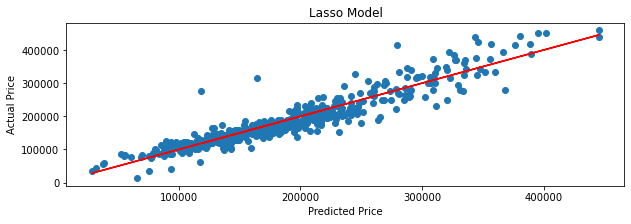

In [147]:
# plot model

plt.figure(figsize=(10, 3))
plt.title("Lasso Model");
plt.scatter(lasso_pred, y_test);
plt.plot(lasso_pred, lasso_pred, color='r');
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

<center><h2>Ridge Regression</h2></center><br>

In [148]:
# initialize Ridge and RidgeCV

ridge = Ridge()
ridge_cv = RidgeCV(alphas=np.logspace(0, 100, 200))

In [149]:
# fit

ridge_cv.fit(X_train_sc, y_train)

RidgeCV(alphas=array([1.00000000e+000, 3.18062569e+000, 1.01163798e+001, 3.21764175e+001,
       1.02341140e+002, 3.25508860e+002, 1.03532184e+003, 3.29297126e+003,
       1.04737090e+004, 3.33129479e+004, 1.05956018e+005, 3.37006433e+005,
       1.07189132e+006, 3.40928507e+006, 1.08436597e+007, 3.44896226e+007,
       1.09698580e+008, 3.48910121e+008, 1.10975250e+009, 3.52970730e+009,
       1.122667...
       2.76828663e+088, 8.80488358e+088, 2.80050389e+089, 8.90735464e+089,
       2.83309610e+090, 9.01101825e+090, 2.86606762e+091, 9.11588830e+091,
       2.89942285e+092, 9.22197882e+092, 2.93316628e+093, 9.32930403e+093,
       2.96730241e+094, 9.43787828e+094, 3.00183581e+095, 9.54771611e+095,
       3.03677112e+096, 9.65883224e+096, 3.07211300e+097, 9.77124154e+097,
       3.10786619e+098, 9.88495905e+098, 3.14403547e+099, 1.00000000e+100]))

In [150]:
# optimal alpha

ridge_cv.alpha_

325.50885998350566

In [151]:
# initialize Ridge with optimal alpha

ridge = Ridge(alpha=ridge_cv.alpha_)

In [152]:
# fit

ridge.fit(X_train_sc, y_train)

Ridge(alpha=325.50885998350566)

In [153]:
# calculate RSME

print("Ridge X_train_sc RMSE:", np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_sc))))
print("Ridge X_test_sc RMSE:", np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_sc))))

Ridge X_train_sc RMSE: 25745.143371023085
Ridge X_test_sc RMSE: 27385.78143640325


In [154]:
# with cross_val_score

ridge_with_cv_score = cross_val_score(ridge, X_train_sc, y_train, cv=10, scoring ='neg_mean_squared_error') * -1
print('Ridge Cross Val RSME:', np.sqrt(ridge_with_cv_score.mean()))

Ridge Cross Val RSME: 30234.070611169598


In [155]:
# columns with coefficients that are not 0

ridge.coef_[lasso.coef_ != 0]

ridge_df = pd.DataFrame({'col':X.columns,
                            'coef':abs(ridge.coef_)})

ridge_df.sort_values('coef', inplace=True, ascending=False)

ridge_df[lasso_df['coef'] != 0]

C:\Users\k-en\AppData\Local\Temp/ipykernel_7956/1704362482.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ridge_df[lasso_df['coef'] != 0]


,col,coef
0,Overall Qual,9924.089595
1,Gr Liv Area,8839.346820
2,Neighborhood_NridgHt,8226.186041
7,Misc Val,7020.810786
10,Total SF,6910.031158
...,...,...
54,MS Zoning_RM,933.875035
55,Heating_OthW,858.111421
60,Land Slope,804.305119
61,Land Contour_Low,709.205166


In [156]:
ridge_df[lasso_df['coef'] == 0]

C:\Users\k-en\AppData\Local\Temp/ipykernel_7956/2663045521.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ridge_df[lasso_df['coef'] == 0]


,col,coef


In [157]:
# predict X_test_sc

ridge_pred = ridge.predict(X_test_sc)

Text(0, 0.5, 'Actual Price')

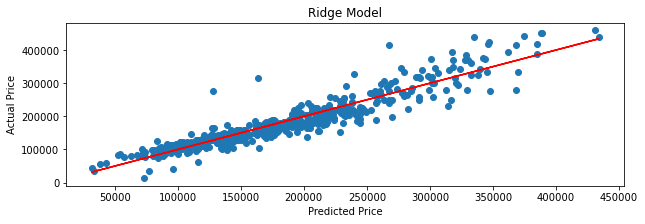

In [158]:
# plot model

plt.figure(figsize=(10, 3))
plt.title("Ridge Model");
plt.scatter(ridge_pred, y_test);
plt.plot(ridge_pred, ridge_pred, color='r');
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

<center><h2>Elastic Net</h2></center><br>

In [159]:
# initialize ElasticNetCV

enet_cv = ElasticNetCV(l1_ratio= 0.5, alphas=np.arange(0.01, 1.0, 0.005), cv=5, verbose=1)

In [160]:
# fit

enet_cv.fit(X_train_sc, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ElasticNetCV(alphas=array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095,
       0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135, 0.14 ,
       0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 , 0.185,
       0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225, 0.23 ,
       0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265, 0.27 , 0.275,
       0.28 , 0.285, 0.29 , 0.295, 0.3  , 0....
       0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 , 0.725,
       0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765, 0.77 ,
       0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 , 0.815,
       0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 , 0.855, 0.86 ,
       0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895, 0.9  , 0.905,
       0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 , 0.945, 0.95 ,
       0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985, 0.99 , 0.995]),
             cv=5, v

In [161]:
# initialize ElasticNet with optimal alpha

elasticnet = ElasticNet(alpha=enet_cv.alpha_)

In [162]:
# fit

elasticnet.fit(X_train_sc, y_train)

ElasticNet(alpha=0.7799999999999999)

In [163]:
# calculate RSME

print("ElasticNet X_train_sc RMSE:", np.sqrt(mean_squared_error(y_train, elasticnet.predict(X_train_sc))))
print("ElasticNet X_test_sc RMSE:", np.sqrt(mean_squared_error(y_test, elasticnet.predict(X_test_sc))))

ElasticNet X_train_sc RMSE: 26494.736587545307
ElasticNet X_test_sc RMSE: 27493.94750969941


In [164]:
# with cross_val_score

en_with_cv_score = cross_val_score(elasticnet, X_train_sc, y_train, cv=10, scoring ='neg_mean_squared_error') * -1
print('ElasticNet Cross Val RSME:', np.sqrt(en_with_cv_score.mean()))

ElasticNet Cross Val RSME: 30201.149775451955


In [165]:
# predict X_test_sc

enet_pred = enet_cv.predict(X_test_sc)

Text(0, 0.5, 'Actual Price')

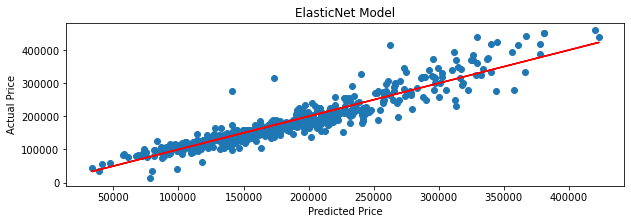

In [166]:
# plot model

plt.figure(figsize=(10, 3))
plt.title("ElasticNet Model");
plt.scatter(enet_pred, y_test);
plt.plot(enet_pred, enet_pred, color='r');
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

<center><h1>Conclusion</h1></center>

In conclusion, Lasso Regression has the lowest score. There are 66 features that we are using and even though I feel like it is a lot, it could be done better in my opinion. I find out that Feature Engineering is a very important concept to eliminate noise and improve predictions.

My Kaggle score was about 23k (Private) and 33k (Public). It is a huge improvement from (80k) the initial score. However, there are many more prediction techniques out there which I have not employed in my project 2. I was also surprised to see that Lasso Model was doing well rather than Ridge Model. In my labs, I have constantly dealt with Ridge Model as they turn out to be better. 

Despite brute-forcing many sections of the project, there is a clear distinction in which experience comes in. Many of the results are obtained by various numerical parameters obtained from labs and solution-code, even though it was mentioned that parameters are usually chosen by us.

[Text(0.5, 1.0, 'Top 30 Features'),
 Text(0.5, 0, 'Coefficient'),
 Text(0, 0.5, 'Features')]

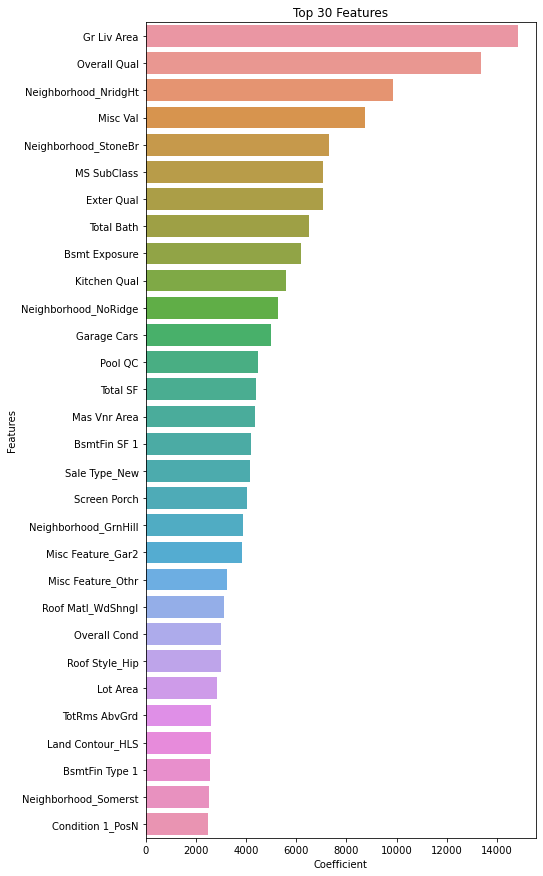

In [167]:
# top 30 features from lasso model

lasso_df[lasso_df['coef'] != 0].head(30)

top_30_features = lasso_df[lasso_df['coef'] != 0].head(30)

plt.figure(figsize=(7, 15))
sns.barplot(data=top_30_features, y='col', x='coef', orient='h').set(
    title='Top 30 Features', xlabel = "Coefficient", ylabel = "Features")

The top 5 features in our model currently consist of <code>Gr Liv Area</code>, <code>Overall Qual</code>, <code> Neighborhood_NridgHt</code>, <code>Misc Val</code> and <code>Neighborhood_StoneBr</code>. The living area and overall quality make sense, because those were key factors which can directly influence <code>SalePrice</code>. However, in the context of this Kaggle project, I went to research on <code>Neighborhood_NridgHt</code>, <code>Misc Val</code> and <code>Neighborhood_StoneBr</code>. I found out that <code>Misc Val</code> includes facilities such as elevator, additional garage, tennis court or other facilities. This would justify the influence of <code>SalePrice</code> as these are costly upgrades.

Out of curiosity, I googled the neighborhood locations <code>Neighborhood_NridgHt</code> and <code>Neighborhood_StoneBr</code>.

<h3>Stone Brooke Rd, Ames</h3>
<code>Neighborhood_StoneBr</code><br>
<img src="../images/p2_stone_brooke.png">

<h3>Northridge Heights</h3>
<code>Neighborhood_NridgHt</code>
<img src="../images/p2_northridge_heights.png">

<center><h1>Kaggle Submission</h1></center>

In [168]:
# check shape

X_train.shape

(1538, 66)

In [169]:
# use X engineered features

X = test_df_clean[lasso_df_features]

In [170]:
# check shape

X.shape

(878, 66)

In [171]:
# check shape

X_train_sc.shape

(1538, 66)

In [172]:
# scale, fit and transform

ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X)

In [173]:
# initialize Lasso and LassoCV

lasso = Lasso()
lasso_cv = LassoCV(n_alphas=200)

lasso_cv.fit(X_train_sc, y_train);

best_alpha_lasso_cv = lasso_cv.alpha_

lasso = Lasso(alpha=best_alpha_lasso_cv)

lasso.fit(X_train_sc, y_train)

test_predictions = lasso.predict(X_test_sc)
submission = pd.DataFrame(test_df['Id'])
submission['SalePrice'] = test_predictions

In [174]:
# check submission rows and column in SalePrice

submission['SalePrice']

0      125485.724075
1      152567.511876
2      242028.879665
3      110321.720611
4      189967.567164
           ...      
873    203720.890376
874    225595.612189
875    124106.034301
876    105852.175086
877    129436.719232
Name: SalePrice, Length: 878, dtype: float64

In [175]:
# output for submission

submission.to_csv('../datasets/lasso_predictions.csv', index=False)

<img src="../images/kaggle_score.png">